In [1]:
!pip install deepface
from deepface import DeepFace
import cv2
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=f909d718f725549008d1c07c758de1e463a37162d654271324ec83a9bd1ff8b2
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
24-02-22 15:24:35 - Directory /root/.deepface created
24-02-22 15:24:35 - Directory /root/.deepface/weights created


## Read the video descriptions dataset

The identification number (e.g., 1), the gender (F: female; M: male), and the PEDFE code are provided for each subject, followed by the emotion (e.g., disgust) and the type expressed (e.g., genuine). The first letter of the PEDFE code indicates the subject's number, while the second (i.e., d=disgust, f=happiness, p=fear, r=anger, s=surprise, t=sadness)  and the third letter (i.e., g= genuine; s=posed) represent the emotion and the type expressed. The last digit of the code is a random number used to discriminate the same subject's emotion and avoid overlapping among the same subject's clips. The hit rate accuracy scores for emotion and genuineness represent the percentage in which raters correctly recognize the emotion and the authenticity displayed in the clip. Additionally, the mean scores and standard deviations (SD) for the intensity and genuineness dimension on a 10 (0-9) and 15 (-7; 7) point scale, separately are shown. Finally, the duration of each clip in seconds is provided in the column “Duration”.


In [7]:
df = pd.read_excel('/content/Supplemental_Material_T2 (1).xlsx')

In [ ]:
df.head(20)

Subject Gender PEDFE_code     Type    Emotion  Hit rate Emotion (%)  \
0       NaN    NaN        NaN      NaN        NaN                   NaN   
1       NaN    NaN        NaN      NaN        NaN                   NaN   
2       NaN    NaN        NaN      NaN        NaN                   NaN   
3       NaN    NaN        NaN      NaN        NaN                   NaN   
4       NaN    NaN        NaN      NaN        NaN                   NaN   
5       1.0      F     1_dg_1  Genuine    Disgust             78.787879   
6       1.0      F     1_dg_2  Genuine    Disgust             54.545455   
7       1.0      F     1_dg_3  Genuine    Disgust            100.000000   
8       1.0      F     1_dg_4  Genuine    Disgust             87.878788   
9       1.0      F     1_dg_5  Genuine    Disgust             63.636364   
10      1.0      F     1_dg_6  Genuine    Disgust             81.818182   
11      1.0      F     1_ds_1    Posed    Disgust            100.000000   
12      1.0      F     1_ds_2    Posed    Disgust             81.818182   
13      1.0      F     1_ds_3    Posed    Disgust            100.000000   
14      1.0      F     1_ds_4    Posed    Disgust             96.153846   
15      1.0      F     1_fg_1  Genuine  Happiness            100.000000   
16      1.0      F     1_fg_2  Genuine  Happiness             78.947368   
17      1.0      F     1_fg_3  Genuine  Happiness             85.714286   
18      1.0      F     1_fg_4  Genuine  Happiness             96.969697   
19      1.0      F     1_fg_5  Genuine  Happiness             96.000000   

    Hit rate Typo (%)  Mean_Genuineness  SD_Genuineness  Mean_Intensity  \
0                 NaN               NaN             NaN             NaN   
1                 NaN               NaN             NaN             NaN   
2                 NaN               NaN             NaN             NaN   
3                 NaN               NaN             NaN             NaN   
4                 NaN               NaN             NaN             NaN   
5           66.666667          2.121212        3.586063        2.939394   
6           95.450000          3.000000        1.923538        3.523810   
7           92.300000          4.960000        3.409301        5.920000   
8           57.575758          1.878788        3.551035        3.878788   
9           54.545455          1.303030        3.964568        3.939394   
10          69.696970          2.181818        3.450132        3.333333   
11          36.363636          1.090909        4.311059        4.666667   
12          30.303030          1.727273        3.555565        3.939394   
13          30.430000          0.652174        3.663192        3.695652   
14          15.380000          2.961538        2.972955        5.538462   
15          76.920000          2.038462        3.117445        3.692308   
16          80.950000          2.380952        2.654735        2.952381   
17          85.710000          3.629630        2.803132        3.481481   
18          69.696970          4.424242        2.136444        4.757576   
19          96.150000          4.640000        1.890326        4.960000   

    SD_Intensity  Duration(s)  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
5       1.999053     3.836994  
6       2.088517     5.471911  
7       1.681269     2.468973  
8       1.849959     2.635914  
9       1.983359     3.370007  
10      1.632993     2.635914  
11      2.086664     3.370007  
12      1.869816     2.936034  
13      1.459601     3.302946  
14      1.943827     1.969021  
15      1.738257     3.302946  
16      2.011870     4.403974  
17      1.805342     1.702016  
18      1.854560     3.270025  
19      2.207563     3.236994

In [8]:
df = df.drop([0, 1, 2, 3, 4])

In [ ]:
df.isna().sum()

Subject                 0
Gender                  0
PEDFE_code              0
Type                    0
Emotion                 0
Hit rate Emotion (%)    0
Hit rate Typo (%)       0
Mean_Genuineness        0
SD_Genuineness          0
Mean_Intensity          0
SD_Intensity            0
Duration(s)             0
dtype: int64

In [ ]:
data = df[(df['Emotion'] == 'Happiness') & (df['Type'] == 'Genuine')]

In [ ]:
print(df[df['PEDFE_code'] == '1_fg_1'].iloc[0, 4])

Happiness


In [ ]:
data

Subject Gender PEDFE_code     Type    Emotion  Hit rate Emotion (%)  \
15        1.0      F     1_fg_1  Genuine  Happiness            100.000000   
16        1.0      F     1_fg_2  Genuine  Happiness             78.947368   
17        1.0      F     1_fg_3  Genuine  Happiness             85.714286   
18        1.0      F     1_fg_4  Genuine  Happiness             96.969697   
19        1.0      F     1_fg_5  Genuine  Happiness             96.000000   
...       ...    ...        ...      ...        ...                   ...   
1412     56.0      F    56_fg_5  Genuine  Happiness            100.000000   
1436     57.0      F    57_fg_1  Genuine  Happiness            100.000000   
1437     57.0      F    57_fg_2  Genuine  Happiness            100.000000   
1438     57.0      F    57_fg_3  Genuine  Happiness             96.969697   
1439     57.0      F    57_fg_4  Genuine  Happiness             96.969697   

      Hit rate Typo (%)  Mean_Genuineness  SD_Genuineness  Mean_Intensity  \
15            76.920000          2.038462        3.117445        3.692308   
16            80.950000          2.380952        2.654735        2.952381   
17            85.710000          3.629630        2.803132        3.481481   
18            69.696970          4.424242        2.136444        4.757576   
19            96.150000          4.640000        1.890326        4.960000   
...                 ...               ...             ...             ...   
1412          57.690000          0.520000        4.482559        4.760000   
1436          63.636364          2.424242        3.945173        4.030303   
1437          87.878788          1.363636        3.855339        3.757576   
1438          51.515152          3.606061        2.936190        4.515152   
1439          72.727273          3.727273        3.493500        5.696970   

      SD_Intensity  Duration(s)  
15        1.738257     3.302946  
16        2.011870     4.403974  
17        1.805342     1.702016  
18        1.854560     3.270025  
19        2.207563     3.236994  
...            ...          ...  
1412      1.738774     2.903045  
1436      2.242834     2.544007  
1437      1.887960     1.752027  
1438      1.822108     1.710028  
1439      2.297891     2.544007  

[214 rows x 12 columns]

In [ ]:
data['Mean_Intensity'].min()

1.0769230769230769

In [ ]:
data['Mean_Intensity'].max()

7.151515151515151

In [ ]:
df['Duration(s)'].min()

0.082999

In [ ]:
df['Duration(s)'].max()

23.5220649

## Read the videоs, and analyze them one by one

In [2]:
import os

In [3]:
folder_path = '/content/drive/MyDrive/emotion_analysis_intensity/PEDFE_set_clips/PEDFE_set_clips'

In [4]:
video_files = [vid for vid in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, vid))]

In [5]:
len(video_files)

1466

## Part 0: Testing DeepFace for emotion classification based on dominant emotion from each frame

In [ ]:
transform = dict()
transform['happy'] = 'Happiness'
transform['sad'] = 'Sadness'
transform['fear'] = 'Fear'
transform['angry'] = 'Anger'
transform['surprise'] = 'Surprise'
transform['disgust'] = 'Disgust'

In [ ]:
glb_cnt = 0
acc = 0
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))

  ds_emotion = ''

  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    ds_emotion =  df[(df["PEDFE_code"]==code)].iloc[0,4]
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==100:
    break

  cnt = 0
  emotions_seq = list()

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    if cnt % 3 != 0:
      continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)

    for x in results:
      emotions = x['emotion']
      del emotions['neutral']
      max_item = max(emotions.items(), key=lambda x: x[1])
      emotions_seq.append(max_item[0])

  # Release the video capture object
  video_capture.release()

  print(f'PEDFE code: {code}')

  df2 = pd.DataFrame(emotions_seq, columns=['dominant_emotion'])
  emotion_class = df2['dominant_emotion'].value_counts().idxmax()
  emotion_class = transform[emotion_class]

  print(f'Predicted: {emotion_class}')
  print(f'Actual: {ds_emotion}')

  if emotion_class == ds_emotion:
    acc+=1

  print('--------------------------------------------------------------------------')
print(f'Accuracy: {acc / (glb_cnt-1)}')

PEDFE code: 28_ps_2
Predicted: Sadness
Actual: Fear
--------------------------------------------------------------------------
PEDFE code: 14_ds_1
Predicted: Anger
Actual: Disgust
--------------------------------------------------------------------------
PEDFE code: 12_sg_1
Predicted: Sadness
Actual: Surprise
--------------------------------------------------------------------------
PEDFE code: 15_sg_3
Predicted: Sadness
Actual: Surprise
--------------------------------------------------------------------------
PEDFE code: 13_fg_3
Predicted: Sadness
Actual: Happiness
--------------------------------------------------------------------------
PEDFE code: 15_sg_4
Predicted: Happiness
Actual: Surprise
--------------------------------------------------------------------------
PEDFE code: 15_tg_3
Predicted: Sadness
Actual: Sadness
--------------------------------------------------------------------------
PEDFE code: 13_ps_3
Predicted: Anger
Actual: Fear
--------------------------------------

## Part 1: Improving of the previous model, by detecting the emotion based on the biggest sum of probabilities

In [ ]:
glb_cnt = 0
acc = 0
y_true = []
y_pred = []
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))

  ds_emotion = ''

  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    ds_emotion =  df[(df["PEDFE_code"]==code)].iloc[0,4]
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==100:
    break

  cnt = 0
  emotions_dict = dict()
  emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']

  for x in emotions:
    emotions_dict[x] = 0.0

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    if cnt % 3 != 0:
      continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)

    for x in results:
      for i in emotions:
        emotions_dict[i] += x['emotion'][i]

  print(code)

  biggest_val_pair = max(emotions_dict.items(), key=lambda x: x[1])
  emotion_class = biggest_val_pair[0]
  emotion_class = transform[emotion_class]

  print(f'Predicted: {emotion_class}')
  print(f'Actual: {ds_emotion}')
  y_true.append(ds_emotion)
  y_pred.append(emotion_class)

  if emotion_class == ds_emotion:
    acc+=1

  print('--------------------------------------------------------------------------')
print(f'Accuracy: {acc / (glb_cnt-1)}')

24-02-21 16:21:36 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 106MB/s]


28_ps_2
Predicted: Sadness
Actual: Fear
--------------------------------------------------------------------------
14_ds_1
Predicted: Anger
Actual: Disgust
--------------------------------------------------------------------------
12_sg_1
Predicted: Sadness
Actual: Surprise
--------------------------------------------------------------------------
15_sg_3
Predicted: Happiness
Actual: Surprise
--------------------------------------------------------------------------
13_fg_3
Predicted: Anger
Actual: Happiness
--------------------------------------------------------------------------
15_sg_4
Predicted: Happiness
Actual: Surprise
--------------------------------------------------------------------------
15_tg_3
Predicted: Sadness
Actual: Sadness
--------------------------------------------------------------------------
13_ps_3
Predicted: Anger
Actual: Fear
--------------------------------------------------------------------------
12_rs_2
Predicted: Sadness
Actual: Anger
------------------

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
labels = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred, labels = labels)

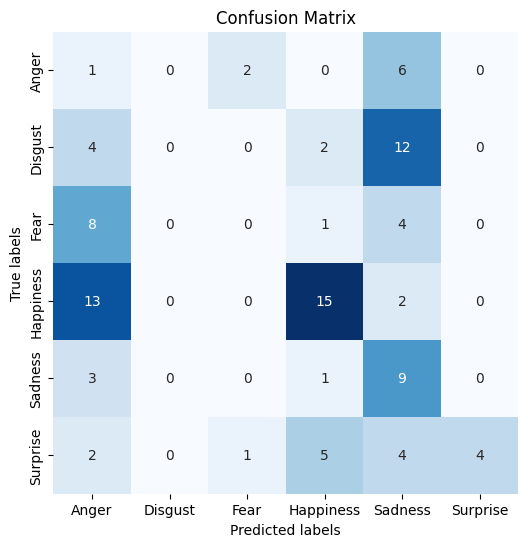

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Part 2: Comparison of the intensity of DeepFace and the intensity in PEDFE dataset

In [ ]:
pedfe_intensity = []
deepface_intensity = []
y_true, y_pred = [], []
glb_cnt = 0
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))


  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    if df[(df["PEDFE_code"]==code)].iloc[0,4] != 'Happiness':
      continue
  else:
    continue


  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==100:
    break

  pedfe_intensity.append(float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100)

  cnt = 0
  emotions_seq = list()
  happiness_coef = 0.0 # sum of the probalility of happiness of each frame in the video

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    if cnt % 3 != 0:
      continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)

    for x in results:
        emotions_seq.append(x['emotion']['happy'])
        happiness_coef += x['emotion']['happy']

  # Release the video capture object
  video_capture.release()
  true = float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100
  pred = happiness_coef / len(emotions_seq)
  y_true.append(true)
  y_pred.append(pred)

  print(f'Average happiness probability that DeepFace calculated {pred}')
  deepface_intensity.append(happiness_coef / len(emotions_seq))
  print(f'PEDFE emotion intensity: {true}')
  print('--------------------------------------------------------------------------')

24-02-21 22:04:34 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 33.7MB/s]


Average happiness probability that DeepFace calculated 4.703745728638536
PEDFE emotion intensity: 38.62433862433863
--------------------------------------------------------------------------
Average happiness probability that DeepFace calculated 86.31926084706984
PEDFE emotion intensity: 67.34006734006735
--------------------------------------------------------------------------
Average happiness probability that DeepFace calculated 92.99356323191374
PEDFE emotion intensity: 76.43097643097643
--------------------------------------------------------------------------
Average happiness probability that DeepFace calculated 0.0017022677657970186
PEDFE emotion intensity: 46.40522875816993
--------------------------------------------------------------------------
Average happiness probability that DeepFace calculated 4.921454890941466
PEDFE emotion intensity: 52.02020202020202
--------------------------------------------------------------------------
Average happiness probability that DeepFa

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_true, y_pred)
r2

-5.731206057653937

In [ ]:
print(len(pedfe_intensity))
print(len(deepface_intensity))

29
29


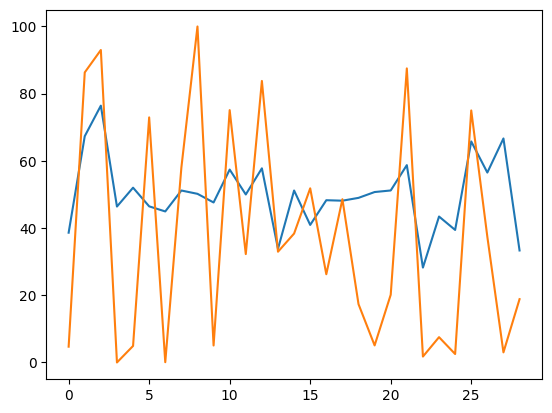

In [ ]:
plt.plot(pedfe_intensity)
plt.plot(deepface_intensity)
plt.show()

## Part 3: Intensity (probablility) over time for some videos

24-02-22 15:27:23 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 18.4MB/s]


13_fg_3
Average happiness probability that DeepFace calculated 4.069818271180464
PEDFE emotion intensity: 38.62433862433863


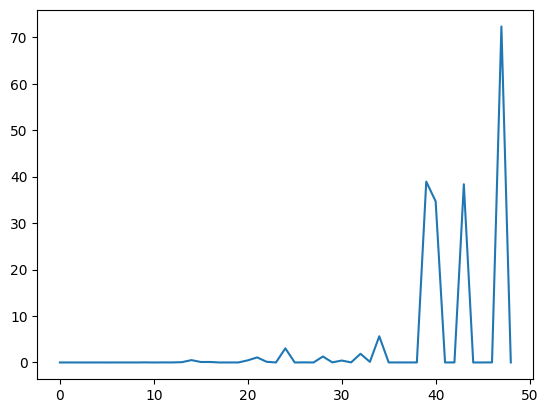

--------------------------------------------------------------------------
12_fg_1
Average happiness probability that DeepFace calculated 89.16821585311713
PEDFE emotion intensity: 67.34006734006735


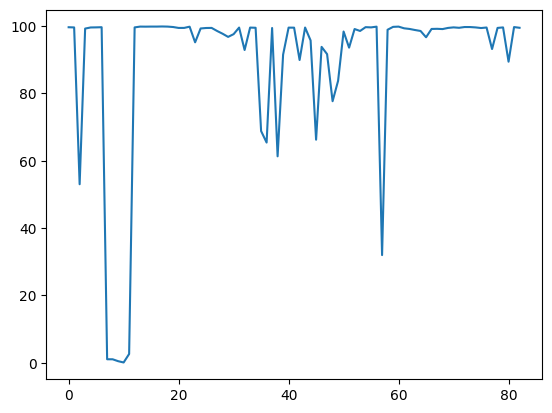

--------------------------------------------------------------------------
17_fg_1
Average happiness probability that DeepFace calculated 92.98927421928165
PEDFE emotion intensity: 76.43097643097643


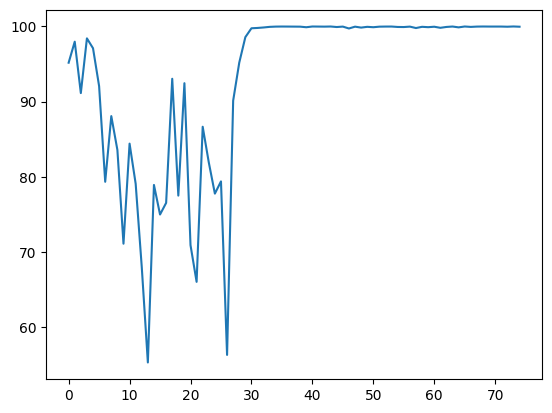

--------------------------------------------------------------------------
13_fg_4
Average happiness probability that DeepFace calculated 0.0013281200018748353
PEDFE emotion intensity: 46.40522875816993


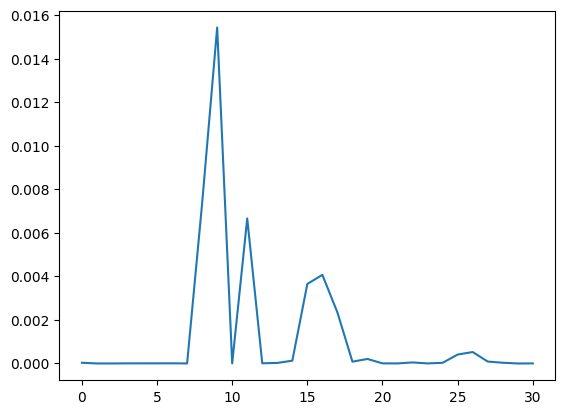

--------------------------------------------------------------------------
14_fg_2
Average happiness probability that DeepFace calculated 8.19255620514192
PEDFE emotion intensity: 52.02020202020202


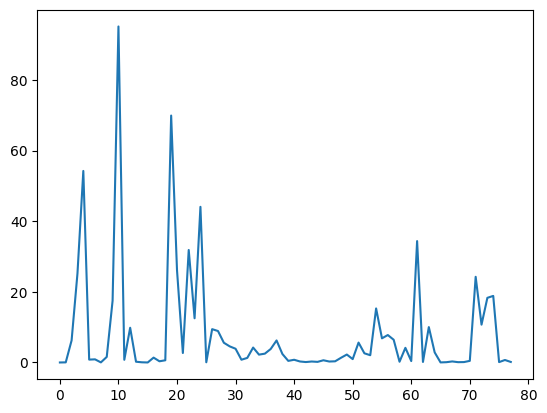

--------------------------------------------------------------------------
12_fs_3
Average happiness probability that DeepFace calculated 66.11854242293855
PEDFE emotion intensity: 46.464646464646464


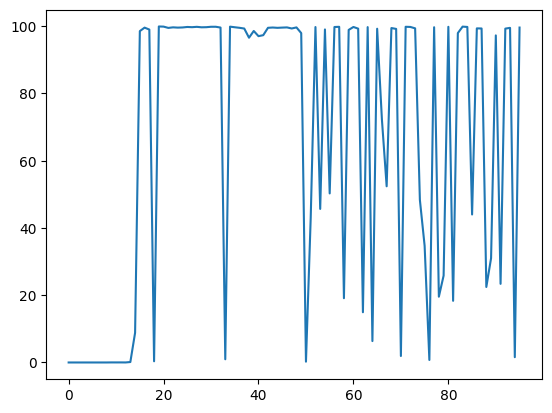

--------------------------------------------------------------------------
13_fg_1
Average happiness probability that DeepFace calculated 0.2111382116858476
PEDFE emotion intensity: 44.949494949494955


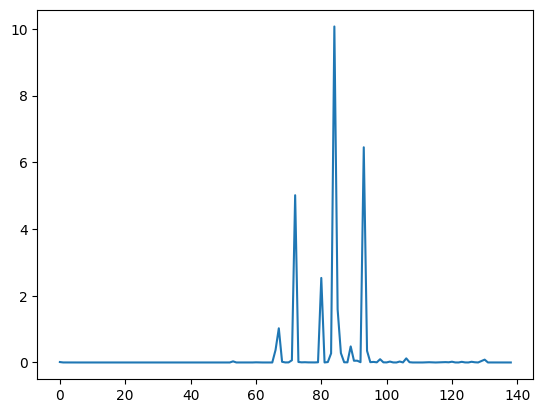

--------------------------------------------------------------------------
15_fs_1
Average happiness probability that DeepFace calculated 57.67554599110541
PEDFE emotion intensity: 51.178451178451176


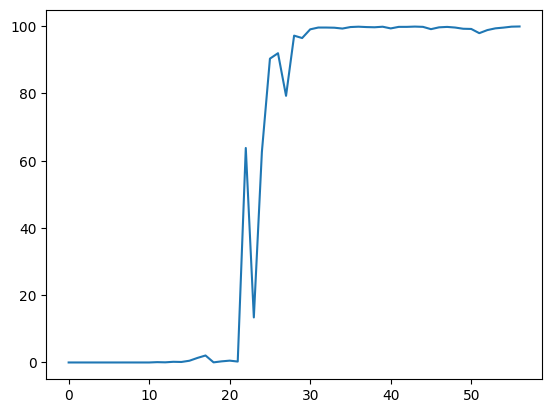

--------------------------------------------------------------------------
17_fg_5
Average happiness probability that DeepFace calculated 99.99290607289036
PEDFE emotion intensity: 50.191570881226056


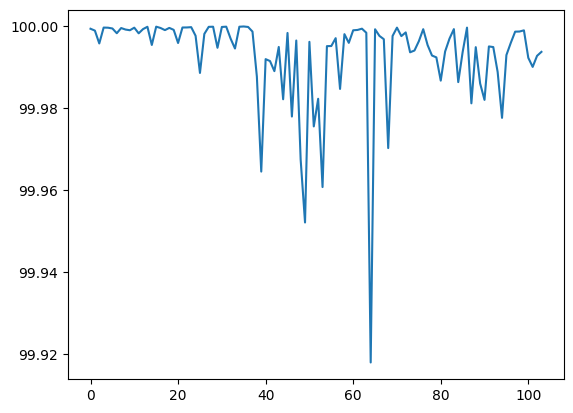

--------------------------------------------------------------------------
18_fg_9
Average happiness probability that DeepFace calculated 7.626776933119456
PEDFE emotion intensity: 47.61904761904761


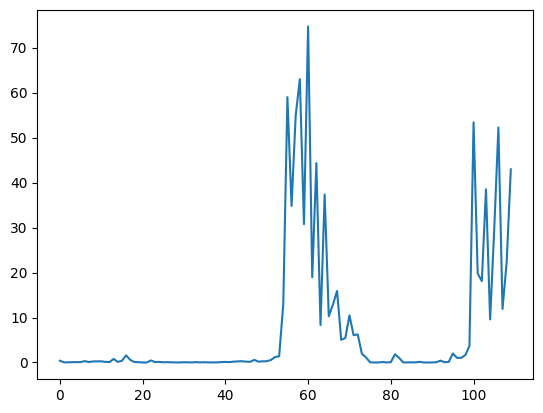

--------------------------------------------------------------------------
18_fg_4
Average happiness probability that DeepFace calculated 75.3285294616993
PEDFE emotion intensity: 57.407407407407405


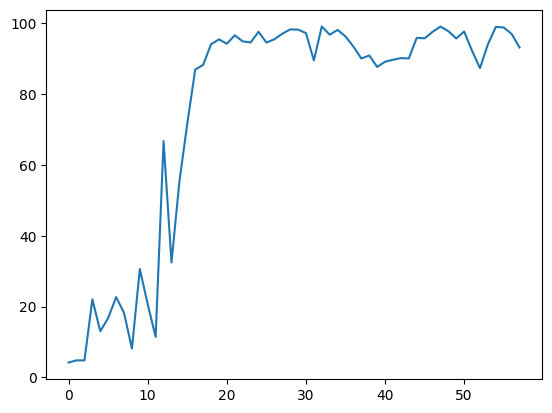

--------------------------------------------------------------------------
19_fg_9
Average happiness probability that DeepFace calculated 33.175249890783284
PEDFE emotion intensity: 50.0


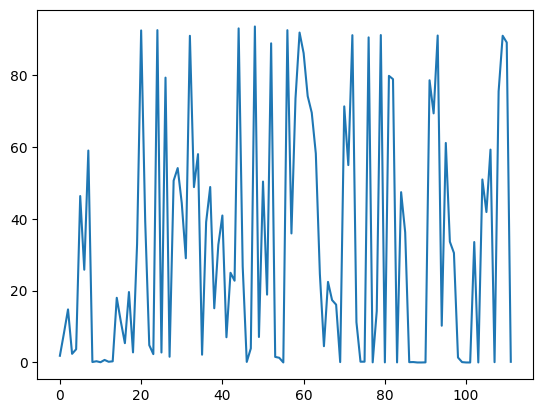

--------------------------------------------------------------------------
18_fg_2
Average happiness probability that DeepFace calculated 82.15920906604866
PEDFE emotion intensity: 57.777777777777786


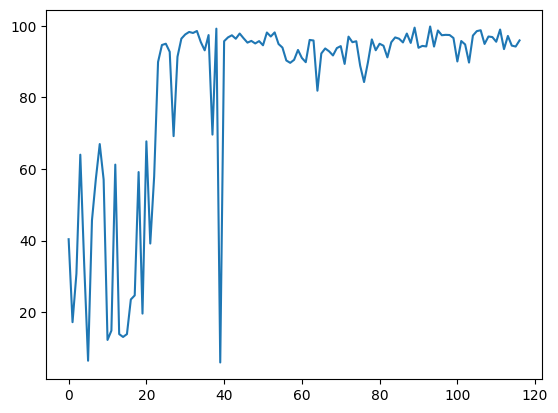

--------------------------------------------------------------------------
19_fg_1
Average happiness probability that DeepFace calculated 31.77141240733594
PEDFE emotion intensity: 33.83838383838384


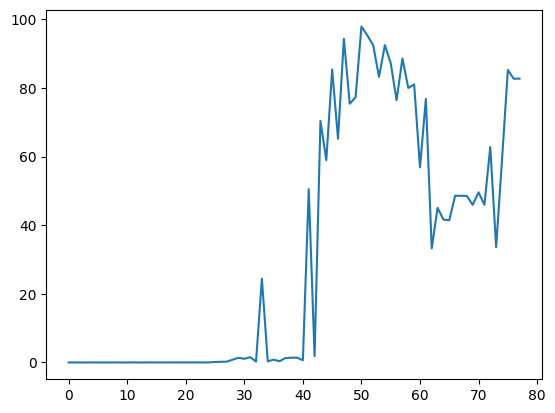

--------------------------------------------------------------------------
19_fs_4
Average happiness probability that DeepFace calculated 41.512852906898246
PEDFE emotion intensity: 51.178451178451176


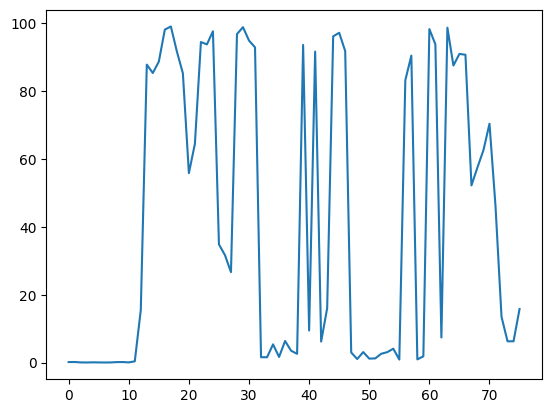

--------------------------------------------------------------------------
18_fg_1
Average happiness probability that DeepFace calculated 51.754378031352154
PEDFE emotion intensity: 40.93567251461988


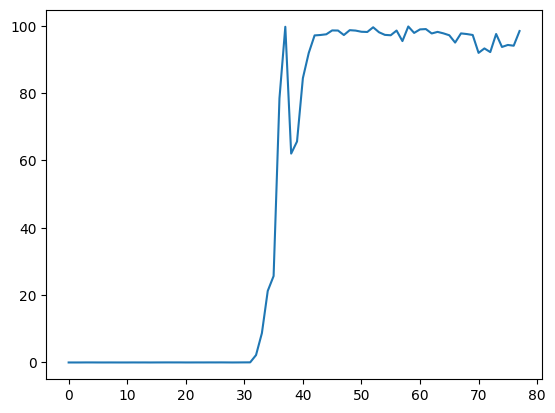

--------------------------------------------------------------------------
19_fs_2
Average happiness probability that DeepFace calculated 35.07615047978382
PEDFE emotion intensity: 48.29059829059828


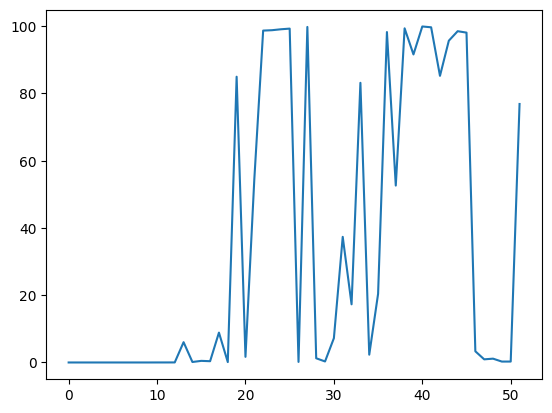

--------------------------------------------------------------------------
19_fs_3
Average happiness probability that DeepFace calculated 53.085942899900374
PEDFE emotion intensity: 48.148148148148145


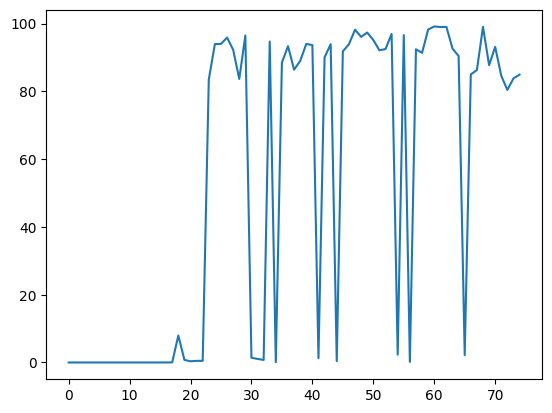

--------------------------------------------------------------------------
19_fg_8
Average happiness probability that DeepFace calculated 18.658076241692296
PEDFE emotion intensity: 48.98989898989899


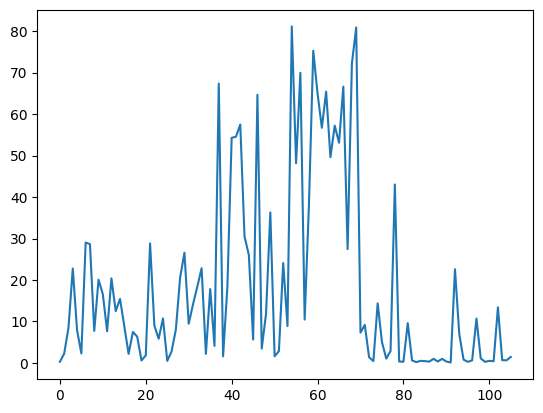

--------------------------------------------------------------------------


In [9]:
glb_cnt = 0
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))

  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    if df[(df["PEDFE_code"]==code)].iloc[0,4] != 'Happiness':
      continue
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==20:
    break

  cnt = 0
  emotions_seq = list()
  happiness_coef = 0.0 # sum of the probalility of happiness of each frame in the video

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    # if cnt % 3 != 0:
    #   continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)
    num_happy_faces = 0

    for x in results:
        emotions_seq.append(x['emotion']['happy'])
        happiness_coef += x['emotion']['happy']

  # Release the video capture object
  video_capture.release()

  print(code)
  print(f'Average happiness probability that DeepFace calculated {happiness_coef / len(emotions_seq)}')
  print(f'PEDFE emotion intensity: {float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100}')
  plt.plot(emotions_seq)
  plt.show()
  print('--------------------------------------------------------------------------')

## Part 4: Solution1 - Averaging sliding window

13_fg_3
Average happiness probability that DeepFace calculated: 4.069818271180464
PEDFE emotion intensity: 38.62433862433863
Smoothed DeepFace result: 2.854611086687176


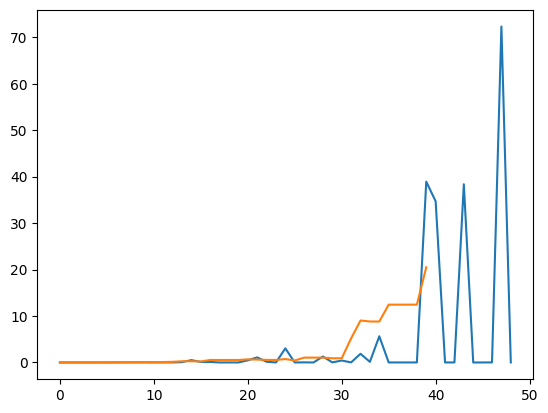

--------------------------------------------------------------------------
12_fg_1
Average happiness probability that DeepFace calculated: 89.16821585311713
PEDFE emotion intensity: 67.34006734006735
Smoothed DeepFace result: 90.20135617760151


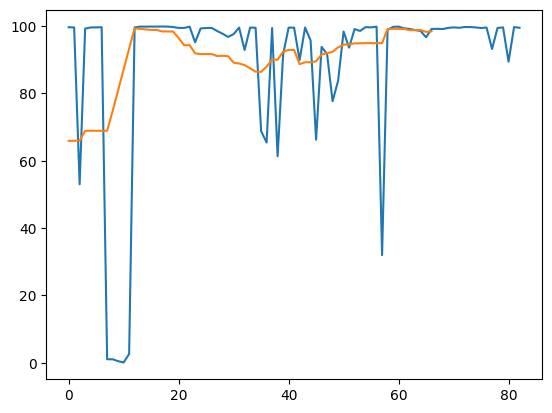

--------------------------------------------------------------------------
17_fg_1
Average happiness probability that DeepFace calculated: 92.98927421928165
PEDFE emotion intensity: 76.43097643097643
Smoothed DeepFace result: 92.4001948137465


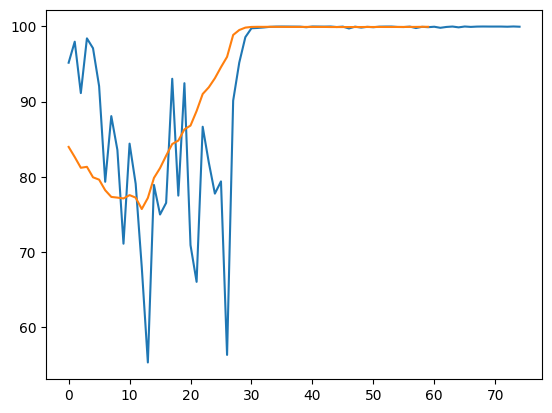

--------------------------------------------------------------------------
13_fg_4
Average happiness probability that DeepFace calculated: 0.0013281200018748353
PEDFE emotion intensity: 46.40522875816993
Smoothed DeepFace result: 0.001633034006246972


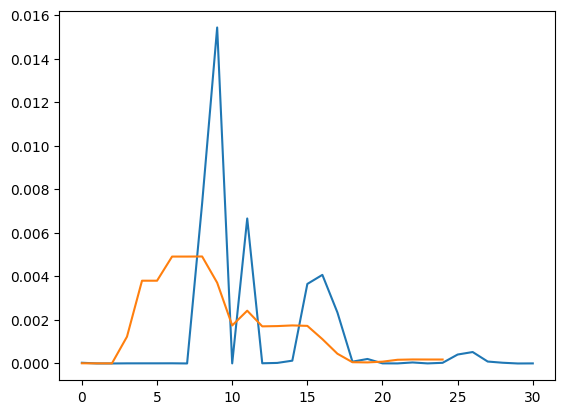

--------------------------------------------------------------------------
14_fg_2
Average happiness probability that DeepFace calculated: 8.19255620514192
PEDFE emotion intensity: 52.02020202020202
Smoothed DeepFace result: 7.816043128901091


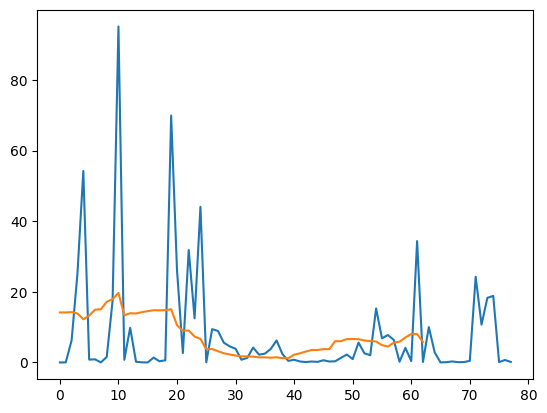

--------------------------------------------------------------------------
12_fs_3
Average happiness probability that DeepFace calculated: 66.11854242293855
PEDFE emotion intensity: 46.464646464646464
Smoothed DeepFace result: 73.21139753101315


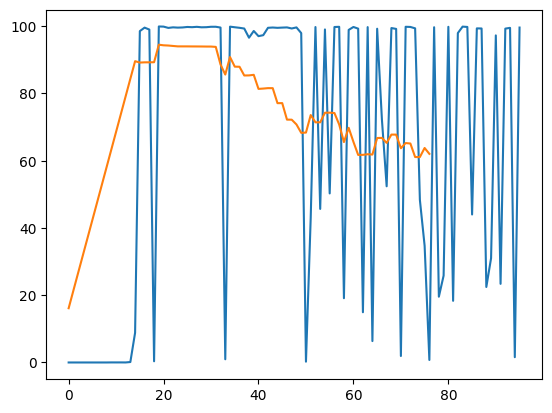

--------------------------------------------------------------------------
13_fg_1
Average happiness probability that DeepFace calculated: 0.2111382116858476
PEDFE emotion intensity: 44.949494949494955
Smoothed DeepFace result: 0.2607305807205783


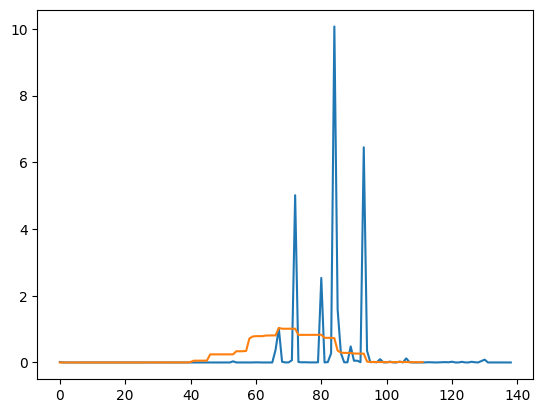

--------------------------------------------------------------------------
15_fs_1
Average happiness probability that DeepFace calculated: 57.67554599110541
PEDFE emotion intensity: 51.178451178451176
Smoothed DeepFace result: 58.50437308055975


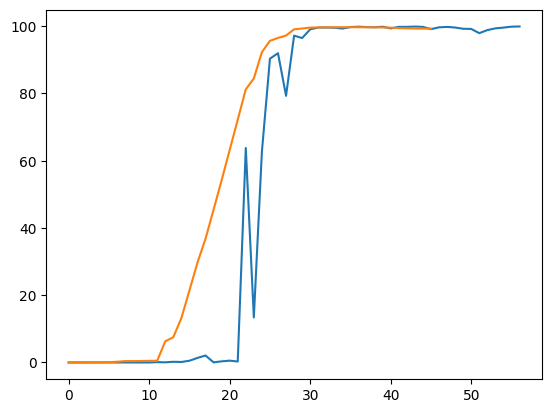

--------------------------------------------------------------------------
17_fg_5
Average happiness probability that DeepFace calculated: 99.99290607289036
PEDFE emotion intensity: 50.191570881226056
Smoothed DeepFace result: 99.99226929165391


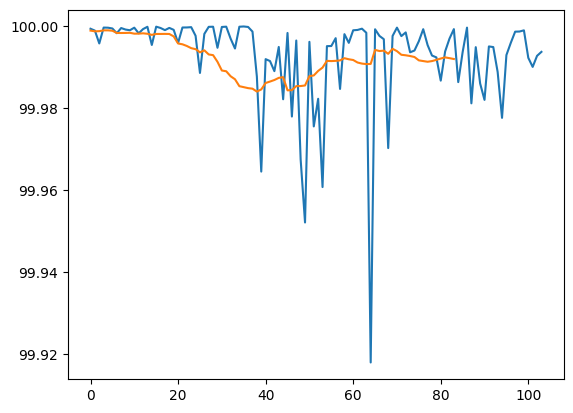

--------------------------------------------------------------------------
18_fg_9
Average happiness probability that DeepFace calculated: 7.626776933119456
PEDFE emotion intensity: 47.61904761904761
Smoothed DeepFace result: 6.769007551284248


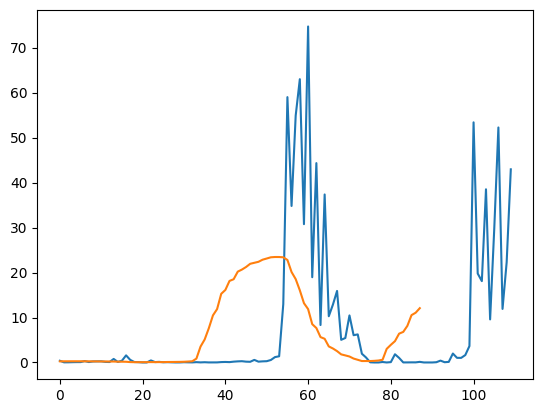

--------------------------------------------------------------------------
18_fg_4
Average happiness probability that DeepFace calculated: 75.3285294616993
PEDFE emotion intensity: 57.407407407407405
Smoothed DeepFace result: 79.56325811387511


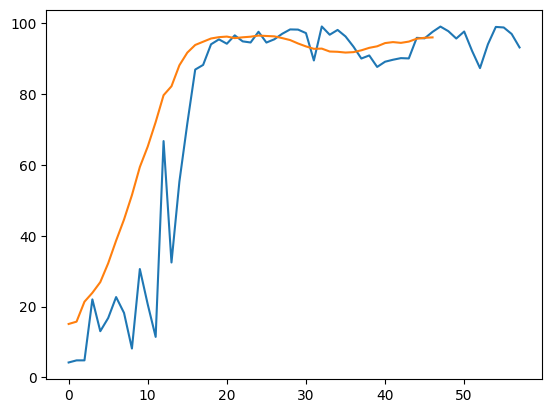

--------------------------------------------------------------------------
19_fg_9
Average happiness probability that DeepFace calculated: 33.175249890783284
PEDFE emotion intensity: 50.0
Smoothed DeepFace result: 34.88334877571385


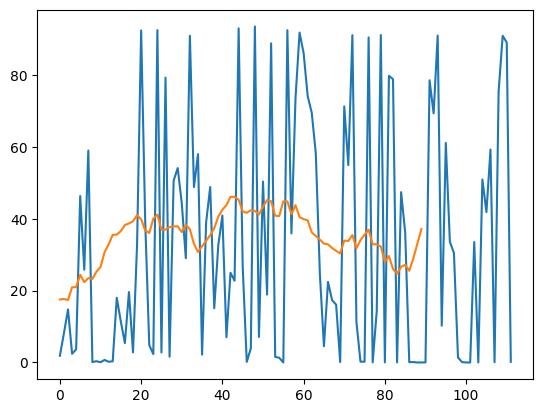

--------------------------------------------------------------------------
18_fg_2
Average happiness probability that DeepFace calculated: 82.15920906604866
PEDFE emotion intensity: 57.777777777777786
Smoothed DeepFace result: 85.8488127292782


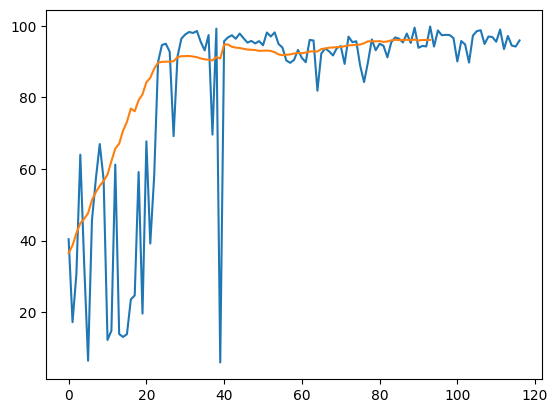

--------------------------------------------------------------------------
19_fg_1
Average happiness probability that DeepFace calculated: 31.77141240733594
PEDFE emotion intensity: 33.83838383838384
Smoothed DeepFace result: 31.58791044451273


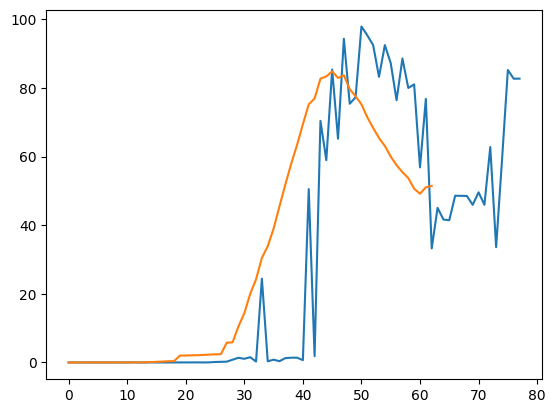

--------------------------------------------------------------------------
19_fs_4
Average happiness probability that DeepFace calculated: 41.512852906898246
PEDFE emotion intensity: 51.178451178451176
Smoothed DeepFace result: 46.20205677429243


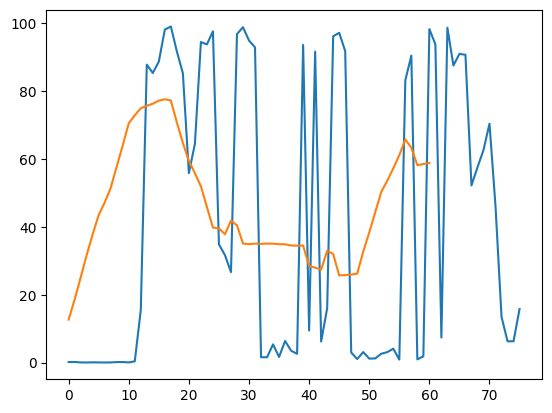

--------------------------------------------------------------------------


In [ ]:
glb_cnt = 0
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))


  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    if df[(df["PEDFE_code"]==code)].iloc[0,4] != 'Happiness':
      continue
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==16:
    break

  cnt = 0
  emotions_seq = list()
  happiness_coef = 0.0 # sum of the probalility of happiness of each frame in the video

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    # if cnt % 3 != 0:
    #   continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)

    for x in results:
        emotions_seq.append(x['emotion']['happy'])
        happiness_coef += x['emotion']['happy']

  # Release the video capture object
  video_capture.release()

  print(code)
  print(f'Average happiness probability that DeepFace calculated: {happiness_coef / len(emotions_seq)}')
  print(f'PEDFE emotion intensity: {float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100}')

  window_size = int(0.2 * len(emotions_seq))
  smoothed_emotion_seq = []

  df2 = pd.DataFrame(emotions_seq, columns=['Happiness coef'])

  for x in range(0, len(emotions_seq)-window_size):
    smoothed_emotion_seq.append(df2['Happiness coef'].iloc[x:x+window_size].mean())

  df3 = pd.DataFrame(smoothed_emotion_seq, columns=['Happiness coef'])

  print(f'Smoothed DeepFace result: {df3["Happiness coef"].mean()}')

  plt.plot(emotions_seq)
  plt.plot(smoothed_emotion_seq)
  plt.show()
  print('--------------------------------------------------------------------------')

## Part 5: Additional approximators test

13_fg_3
Average happiness probability that DeepFace calculated 4.70374077136366
PEDFE emotion intensity: 38.62433862433863
Smoothed DeepFace result 0.11247179840680041
original seq median 0.009350436358133242
smoothed seq median 0.1617994958662518


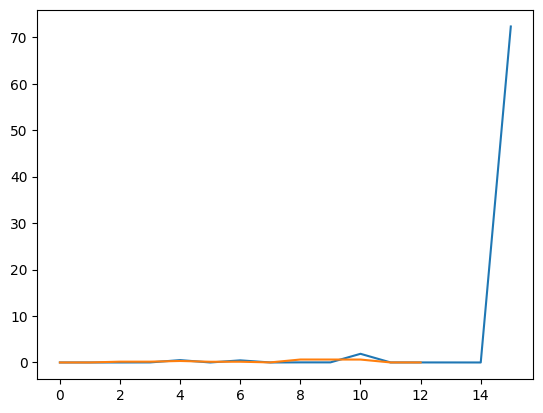

--------------------------------------------------------------------------
12_fg_1
Average happiness probability that DeepFace calculated 86.31927252548745
PEDFE emotion intensity: 67.34006734006735
Smoothed DeepFace result 44.18293552994691
original seq median 98.41199517250061
smoothed seq median 96.7907159854462


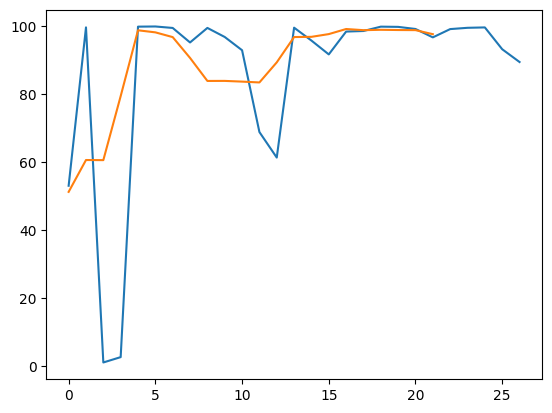

--------------------------------------------------------------------------
17_fg_1
Average happiness probability that DeepFace calculated 92.99355747023714
PEDFE emotion intensity: 76.43097643097643
Smoothed DeepFace result 46.18796714720797
original seq median 99.9036788825606
smoothed seq median 99.80916738346974


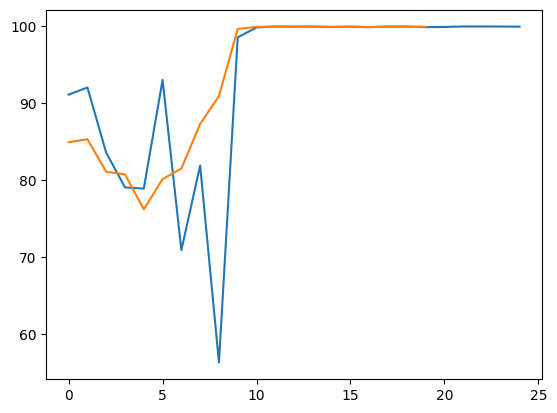

--------------------------------------------------------------------------
13_fg_4
Average happiness probability that DeepFace calculated 0.0017022703724050435
PEDFE emotion intensity: 46.40522875816993
Smoothed DeepFace result 0.0010474910673824013
original seq median 6.779194300872504e-05
smoothed seq median 0.0012049061112210878


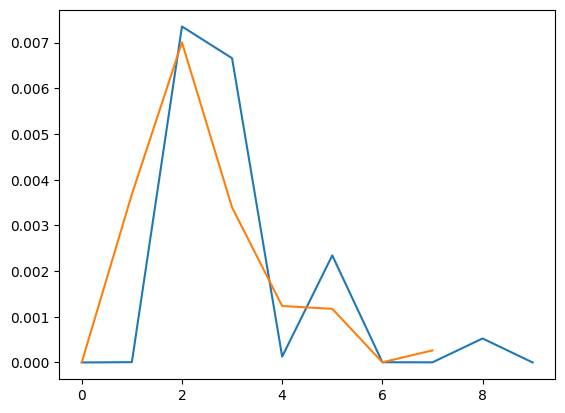

--------------------------------------------------------------------------
14_fg_2
Average happiness probability that DeepFace calculated 4.921452041447305
PEDFE emotion intensity: 52.02020202020202
Smoothed DeepFace result 2.18679062850068
original seq median 1.4378739520907402
smoothed seq median 3.0203475066033674


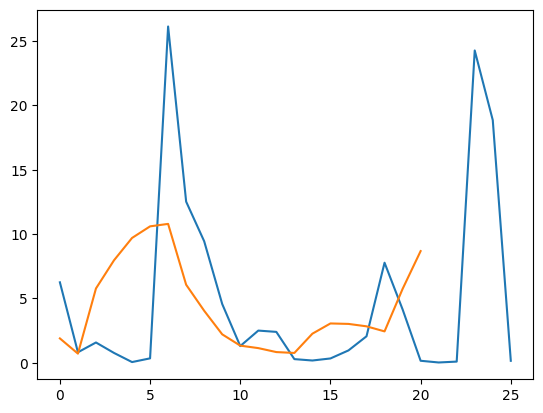

--------------------------------------------------------------------------
12_fs_3
Average happiness probability that DeepFace calculated 72.9382707675079
PEDFE emotion intensity: 46.464646464646464
Smoothed DeepFace result 39.03663532308075
original seq median 99.31138149635571
smoothed seq median 80.90800214484806


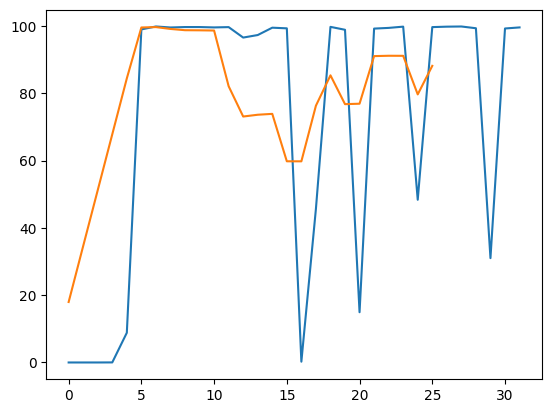

--------------------------------------------------------------------------
13_fg_1
Average happiness probability that DeepFace calculated 0.08476648065411521
PEDFE emotion intensity: 44.949494949494955
Smoothed DeepFace result 0.0526212282045434
original seq median 0.000310531650300843
smoothed seq median 0.008727426998946993


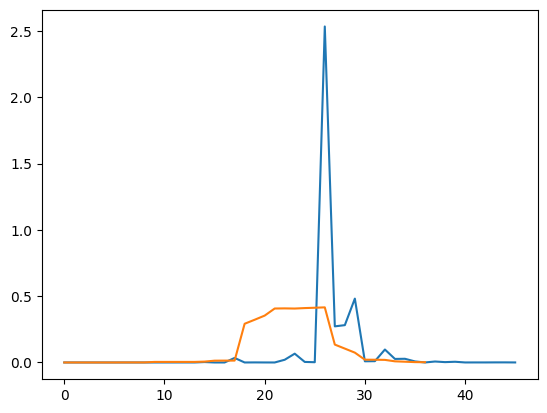

--------------------------------------------------------------------------
15_fs_1
Average happiness probability that DeepFace calculated 57.97957681304371
PEDFE emotion intensity: 51.178451178451176
Smoothed DeepFace result 28.1996676263332
original seq median 96.47938055045836
smoothed seq median 81.6477978846871


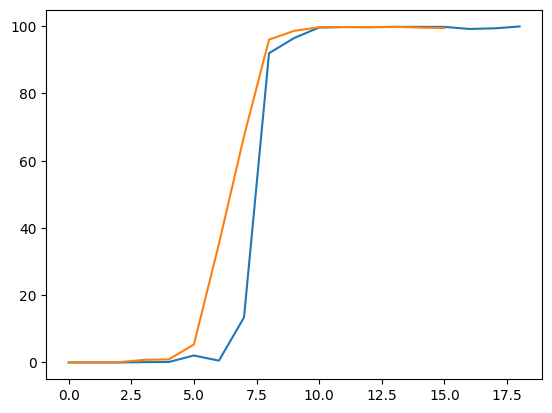

--------------------------------------------------------------------------
17_fg_5
Average happiness probability that DeepFace calculated 99.99365648796605
PEDFE emotion intensity: 50.191570881226056
Smoothed DeepFace result 49.996660561053375
original seq median 99.99604821205139
smoothed seq median 99.99324480692366


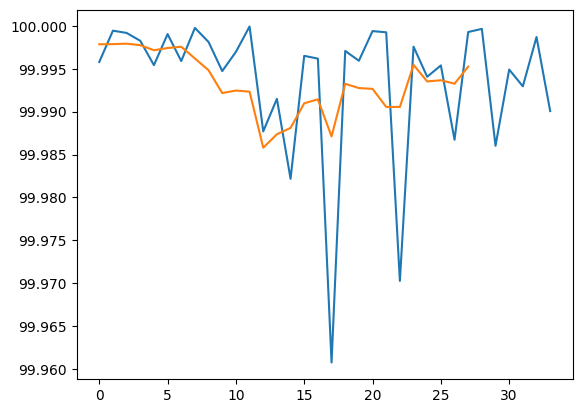

--------------------------------------------------------------------------
18_fg_9
Average happiness probability that DeepFace calculated 5.052558357673931
PEDFE emotion intensity: 47.61904761904761
Smoothed DeepFace result 2.5057780456504273
original seq median 0.25603187342987177
smoothed seq median 0.596309225009328


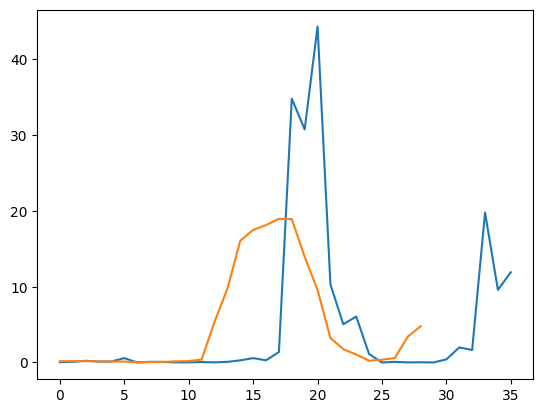

--------------------------------------------------------------------------
18_fg_4
Average happiness probability that DeepFace calculated 75.10386681906806
PEDFE emotion intensity: 57.407407407407405
Smoothed DeepFace result 38.309484423872426
original seq median 94.22521660027306
smoothed seq median 93.55456335572714


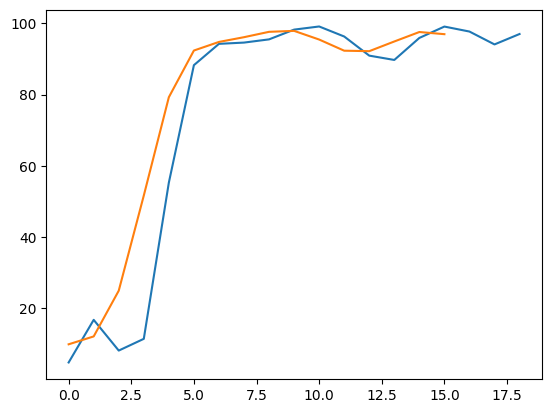

--------------------------------------------------------------------------
19_fg_9
Average happiness probability that DeepFace calculated 32.2583742742273
PEDFE emotion intensity: 50.0
Smoothed DeepFace result 16.432989248871003
original seq median 15.09442149467212
smoothed seq median 34.86747714271885


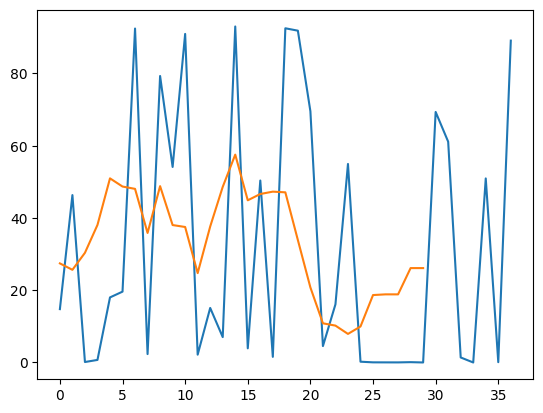

--------------------------------------------------------------------------
18_fg_2
Average happiness probability that DeepFace calculated 83.78391181623141
PEDFE emotion intensity: 57.777777777777786
Smoothed DeepFace result 43.75148869906888
original seq median 94.98912155757886
smoothed seq median 94.67078034226121


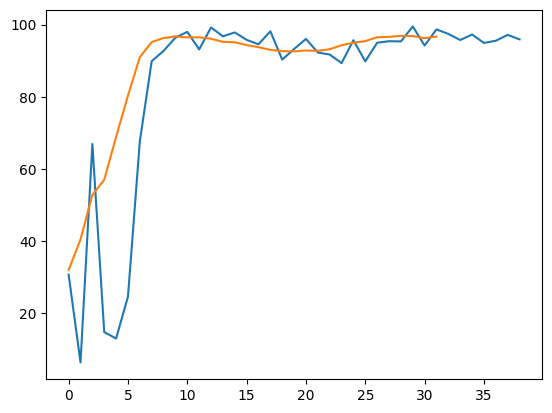

--------------------------------------------------------------------------
19_fg_1
Average happiness probability that DeepFace calculated 32.964892317960086
PEDFE emotion intensity: 33.83838383838384
Smoothed DeepFace result 16.00124005772407
original seq median 17.306431801989675
smoothed seq median 22.38710474358986


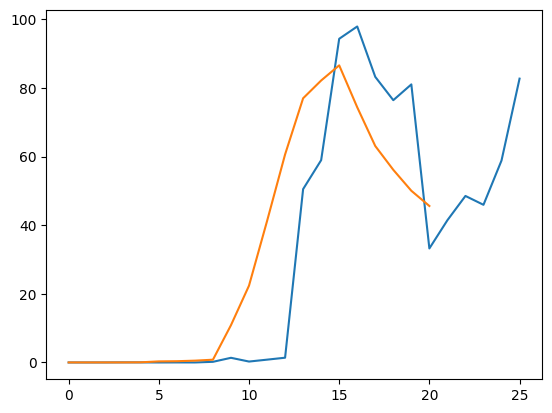

--------------------------------------------------------------------------
19_fs_4
Average happiness probability that DeepFace calculated 38.36974709491712
PEDFE emotion intensity: 51.178451178451176
Smoothed DeepFace result 21.08822363782324
original seq median 7.379505038261414
smoothed seq median 39.000671777741246


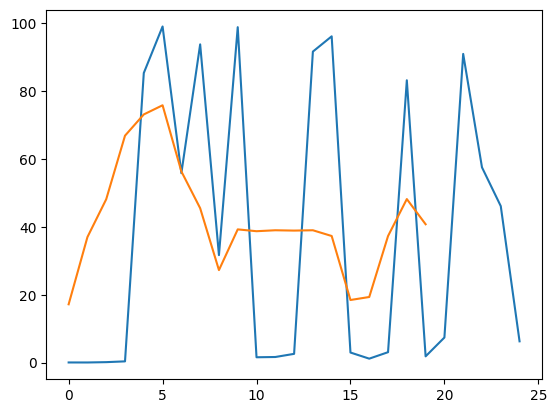

--------------------------------------------------------------------------
18_fg_1
Average happiness probability that DeepFace calculated 51.82901613505491
PEDFE emotion intensity: 40.93567251461988
Smoothed DeepFace result 25.23000784508529
original seq median 76.99595641730455
smoothed seq median 55.87126699503


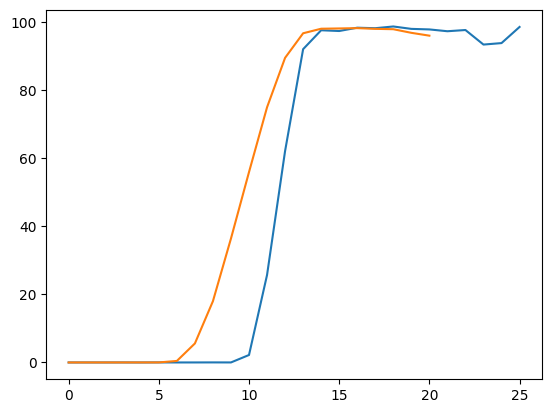

--------------------------------------------------------------------------
19_fs_2
Average happiness probability that DeepFace calculated 26.260223633300782
PEDFE emotion intensity: 48.29059829059828
Smoothed DeepFace result 14.73904028028591
original seq median 0.9333465248346329
smoothed seq median 22.87949187747788


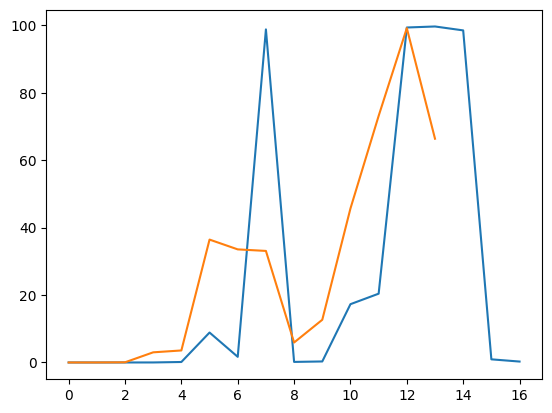

--------------------------------------------------------------------------
19_fs_3
Average happiness probability that DeepFace calculated 48.591029045543294
PEDFE emotion intensity: 48.148148148148145
Smoothed DeepFace result 24.550755389720123
original seq median 83.49695801734924
smoothed seq median 56.144463432412635


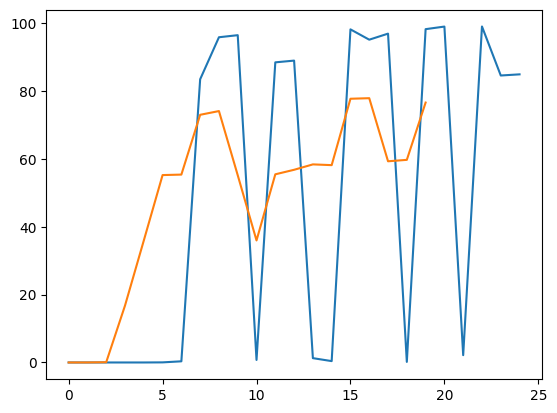

--------------------------------------------------------------------------
19_fg_8
Average happiness probability that DeepFace calculated 17.358313529573497
PEDFE emotion intensity: 48.98989898989899
Smoothed DeepFace result 10.241871407371017
original seq median 7.644916325807571
smoothed seq median 16.95970691069687


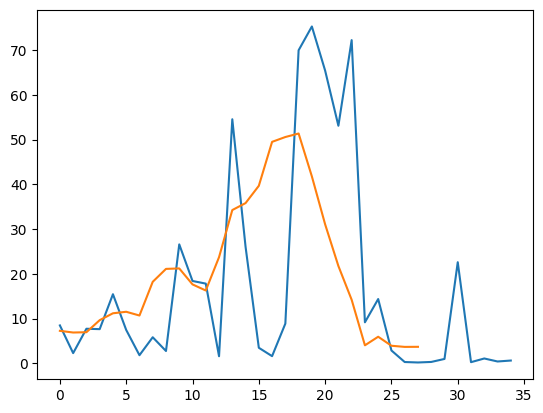

--------------------------------------------------------------------------
19_fg_6
Average happiness probability that DeepFace calculated 5.081110586725937
PEDFE emotion intensity: 50.72463768115942
Smoothed DeepFace result 2.239004437731971
original seq median 0.6750548385018302
smoothed seq median 1.498063744589051


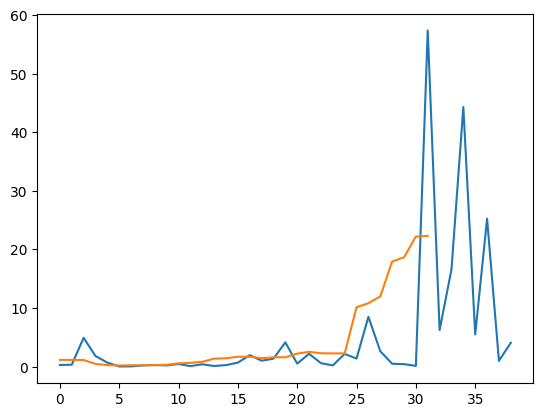

--------------------------------------------------------------------------
19_fg_11
Average happiness probability that DeepFace calculated 20.159019528997234
PEDFE emotion intensity: 51.19047619047619
Smoothed DeepFace result 10.879143598811515
original seq median 5.82653284072876
smoothed seq median 15.376320897465924


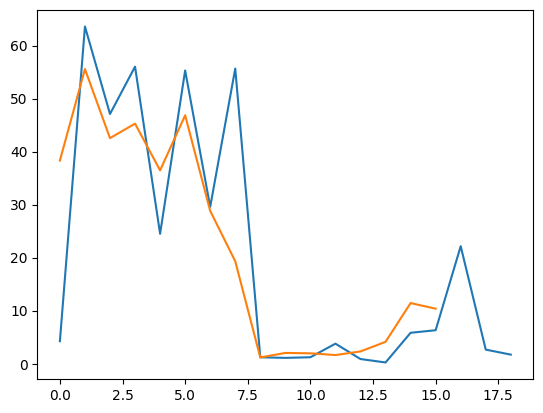

--------------------------------------------------------------------------
18_fg_8
Average happiness probability that DeepFace calculated 87.51778026858734
PEDFE emotion intensity: 58.730158730158735
Smoothed DeepFace result 43.50789515787958
original seq median 90.67790859542228
smoothed seq median 88.68535038697435


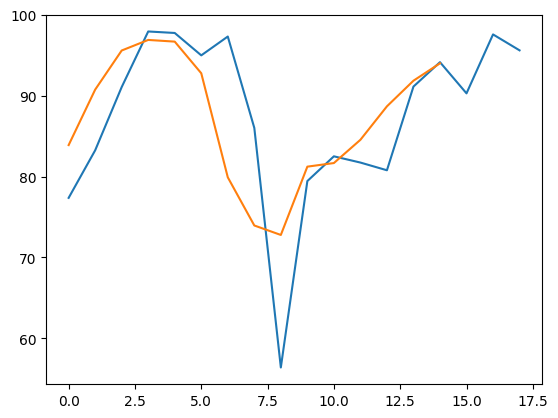

--------------------------------------------------------------------------
20_fs_1
Average happiness probability that DeepFace calculated 1.7637163702679963
PEDFE emotion intensity: 28.240740740740737
Smoothed DeepFace result 0.7643597700619025
original seq median 0.017699988727201674
smoothed seq median 0.021378731169845407


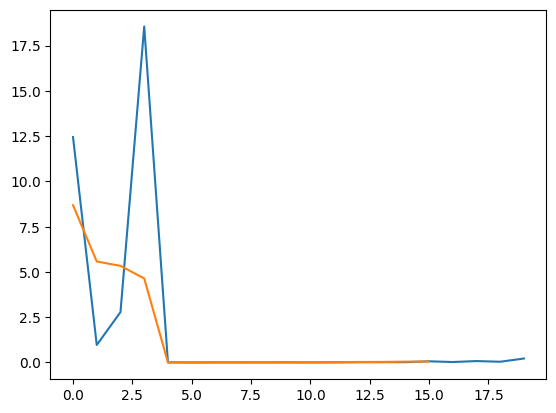

--------------------------------------------------------------------------
19_fg_4
Average happiness probability that DeepFace calculated 7.533581201769744
PEDFE emotion intensity: 43.43434343434344
Smoothed DeepFace result 3.4407185580602215
original seq median 0.7051533488879705
smoothed seq median 4.919394381575856


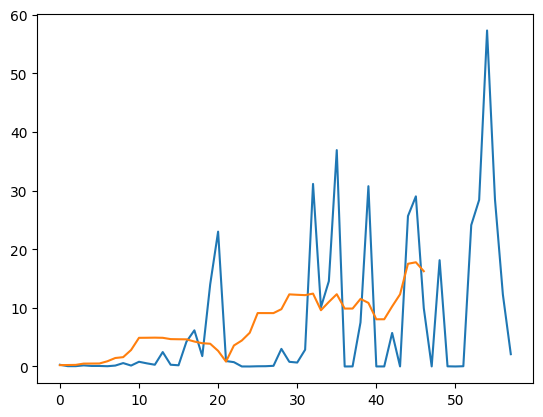

--------------------------------------------------------------------------
20_fs_2
Average happiness probability that DeepFace calculated 2.5178257295847866
PEDFE emotion intensity: 39.44444444444444
Smoothed DeepFace result 1.4594840867762462
original seq median 0.051859262293849046
smoothed seq median 0.4393068885269519


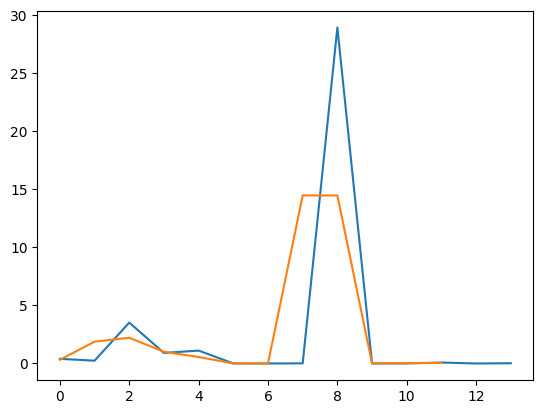

--------------------------------------------------------------------------
18_fg_5
Average happiness probability that DeepFace calculated 75.00331422438839
PEDFE emotion intensity: 65.77777777777779
Smoothed DeepFace result 39.29092173129633
original seq median 92.50636607484412
smoothed seq median 93.19671050667534


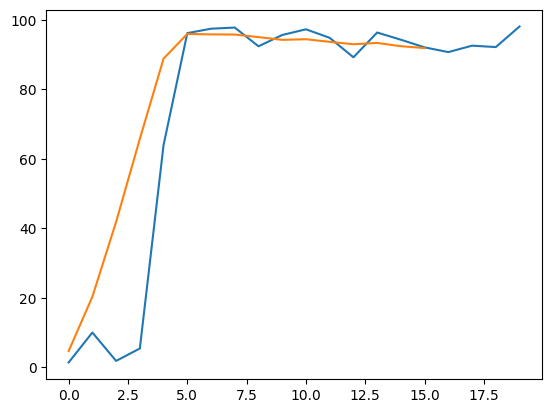

--------------------------------------------------------------------------
19_fg_12
Average happiness probability that DeepFace calculated 37.40012759204181
PEDFE emotion intensity: 56.52173913043479
Smoothed DeepFace result 17.180586948400947
original seq median 21.50845378637314
smoothed seq median 24.107543253847005


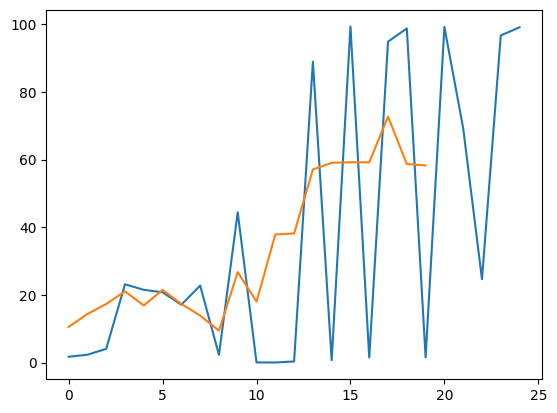

--------------------------------------------------------------------------
20_fg_1
Average happiness probability that DeepFace calculated 3.0088702896227058
PEDFE emotion intensity: 66.66666666666666
Smoothed DeepFace result 1.7530778607937791
original seq median 0.4882952547615463
smoothed seq median 1.2684335272043687


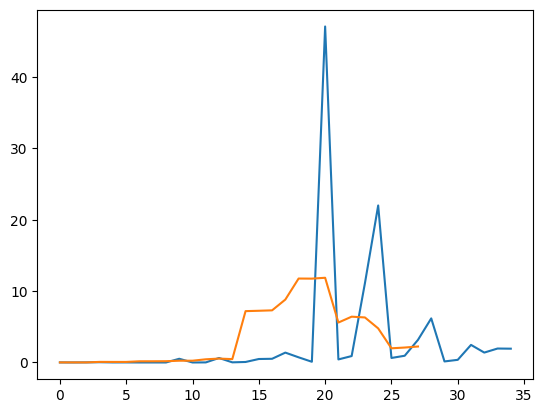

--------------------------------------------------------------------------
19_fg_5
Average happiness probability that DeepFace calculated 18.8487250484212
PEDFE emotion intensity: 33.33333333333333
Smoothed DeepFace result 9.947717926226396
original seq median 12.196006998419762
smoothed seq median 19.246414081316452


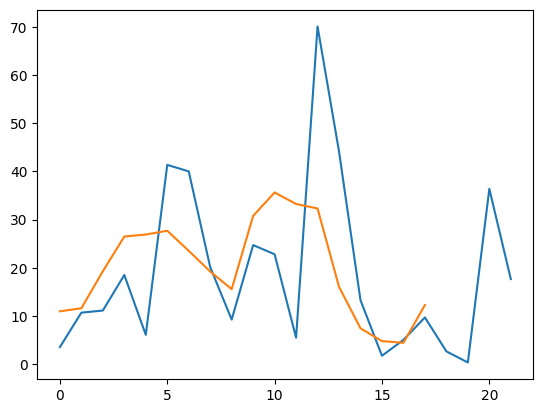

--------------------------------------------------------------------------
20_fg_3
Average happiness probability that DeepFace calculated 5.407212036783828
PEDFE emotion intensity: 53.43915343915344
Smoothed DeepFace result 3.273548333548338
original seq median 0.05669581202597922
smoothed seq median 0.19058384035194242


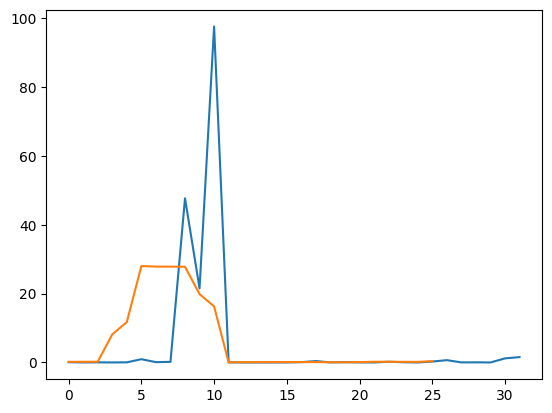

--------------------------------------------------------------------------
20_fg_2
Average happiness probability that DeepFace calculated 0.2122885261954082
PEDFE emotion intensity: 42.42424242424242
Smoothed DeepFace result 0.11541280570554673
original seq median 0.09457658136907621
smoothed seq median 0.19089664588006877


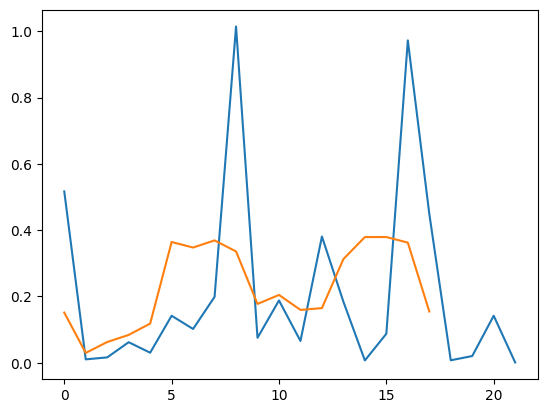

--------------------------------------------------------------------------
18_fs_1
Average happiness probability that DeepFace calculated 35.87278219189011
PEDFE emotion intensity: 47.47474747474747
Smoothed DeepFace result 16.99423768770879
original seq median 28.97843498817099
smoothed seq median 32.5385962758356


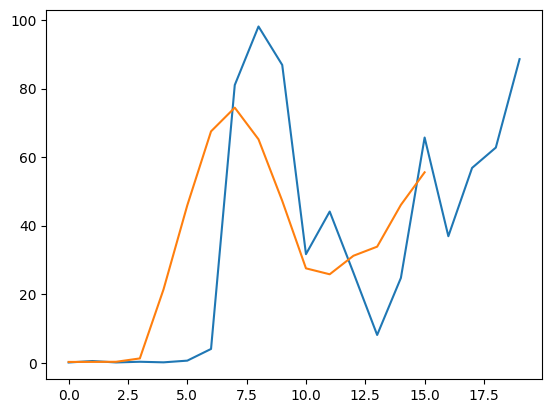

--------------------------------------------------------------------------
19_fg_10
Average happiness probability that DeepFace calculated 21.595351918316062
PEDFE emotion intensity: 62.82051282051282
Smoothed DeepFace result 12.346833133032499
original seq median 3.179558360033231
smoothed seq median 10.781655206681464


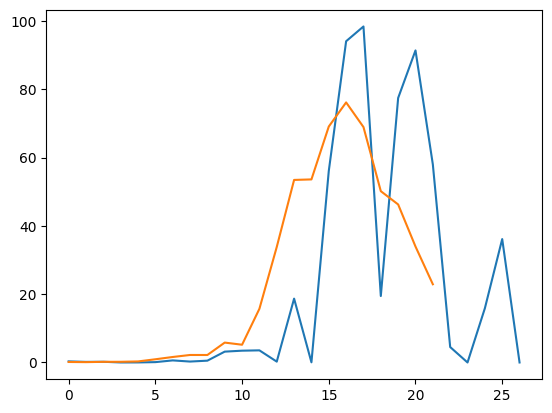

--------------------------------------------------------------------------
19_fg_13
Average happiness probability that DeepFace calculated 39.77233419136153
PEDFE emotion intensity: 52.38095238095239
Smoothed DeepFace result 20.540167234501745
original seq median 13.322554280339652
smoothed seq median 40.08357409063185


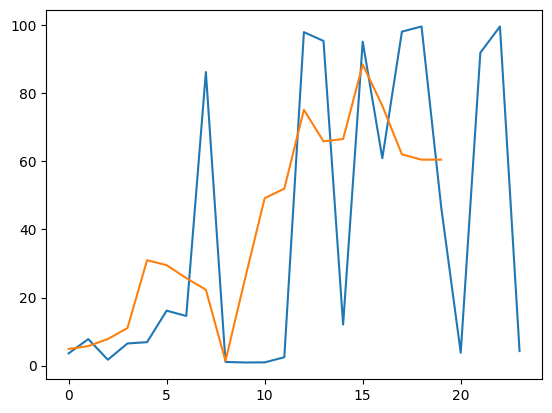

--------------------------------------------------------------------------
18_fs_3
Average happiness probability that DeepFace calculated 44.05527365731235
PEDFE emotion intensity: 45.11784511784512
Smoothed DeepFace result 23.08087022741509
original seq median 49.03168976306915
smoothed seq median 42.354004830121994


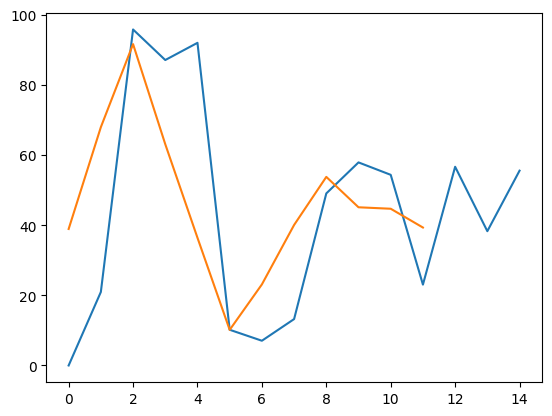

--------------------------------------------------------------------------
18_fg_6
Average happiness probability that DeepFace calculated 95.57332833241956
PEDFE emotion intensity: 59.59595959595959
Smoothed DeepFace result 48.51843981492629
original seq median 98.09338737059433
smoothed seq median 98.03410548910455


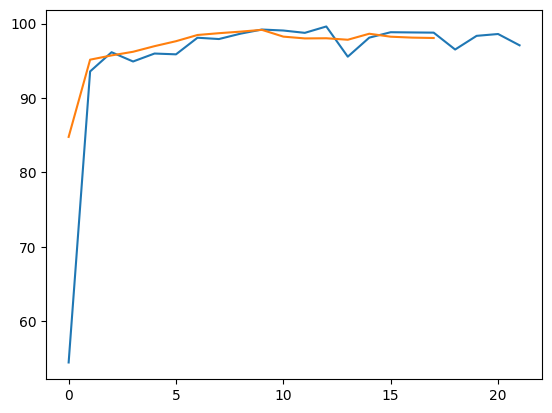

--------------------------------------------------------------------------
19_fs_1
Average happiness probability that DeepFace calculated 36.08138095894265
PEDFE emotion intensity: 47.979797979797986
Smoothed DeepFace result 22.542653674095952
original seq median 0.33501302491951135
smoothed seq median 40.3902267287589


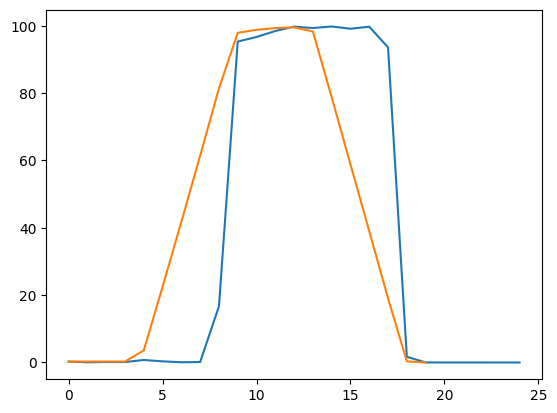

--------------------------------------------------------------------------
18_fg_7
Average happiness probability that DeepFace calculated 82.2411834255954
PEDFE emotion intensity: 64.30976430976432
Smoothed DeepFace result 39.8045475696959
original seq median 98.09923745384663
smoothed seq median 97.74564896783312


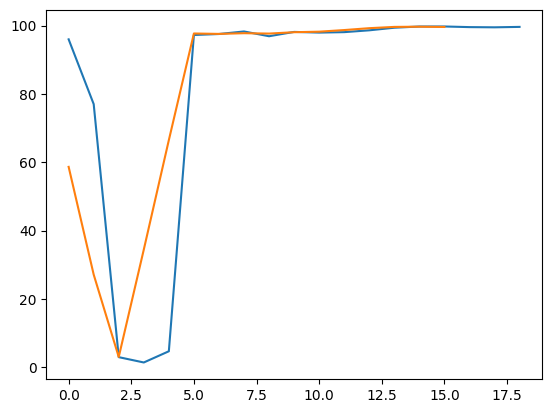

--------------------------------------------------------------------------
19_fg_3
Average happiness probability that DeepFace calculated 9.710711100711451
PEDFE emotion intensity: 57.539682539682545
Smoothed DeepFace result 4.616868679497759
original seq median 4.680631309747696
smoothed seq median 5.589595154002858


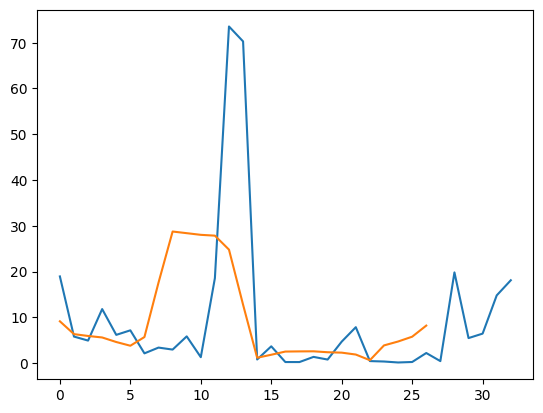

--------------------------------------------------------------------------
19_fg_2
Average happiness probability that DeepFace calculated 8.78450102203493
PEDFE emotion intensity: 46.464646464646464
Smoothed DeepFace result 4.078569210516862
original seq median 0.788775645793427
smoothed seq median 5.483825411770642


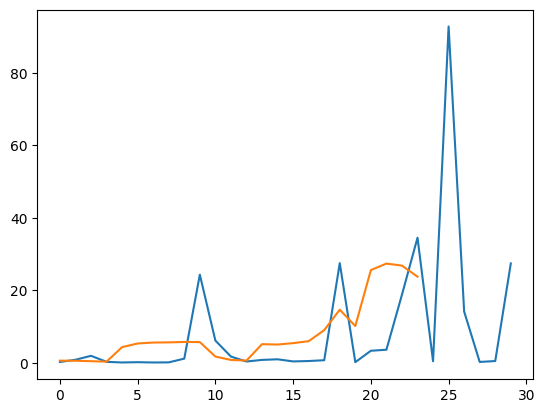

--------------------------------------------------------------------------
19_fg_7
Average happiness probability that DeepFace calculated 29.446967714008743
PEDFE emotion intensity: 56.08465608465608
Smoothed DeepFace result 15.836141302418554
original seq median 18.506839644388048
smoothed seq median 33.44879561141937


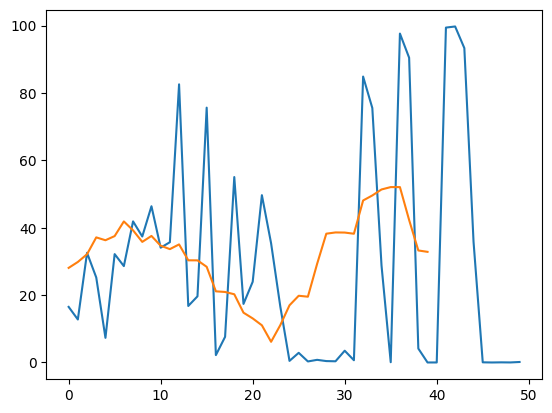

--------------------------------------------------------------------------
18_fg_3
Average happiness probability that DeepFace calculated 92.95725977792455
PEDFE emotion intensity: 58.58585858585859
Smoothed DeepFace result 47.63378339883816
original seq median 96.58481478691101
smoothed seq median 96.65561306030801


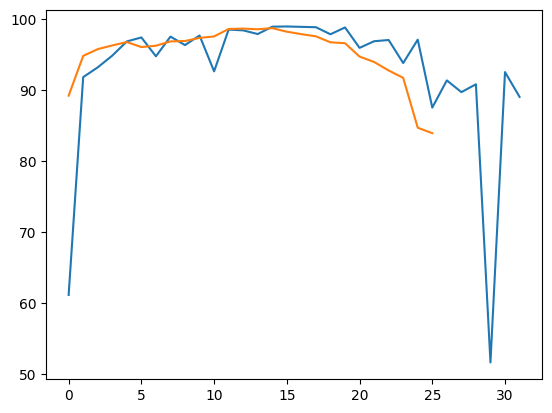

--------------------------------------------------------------------------
18_fs_2
Average happiness probability that DeepFace calculated 82.95091150798449
PEDFE emotion intensity: 52.188552188552194
Smoothed DeepFace result 45.01921744947506
original seq median 95.3087383876727
smoothed seq median 96.88648640332266


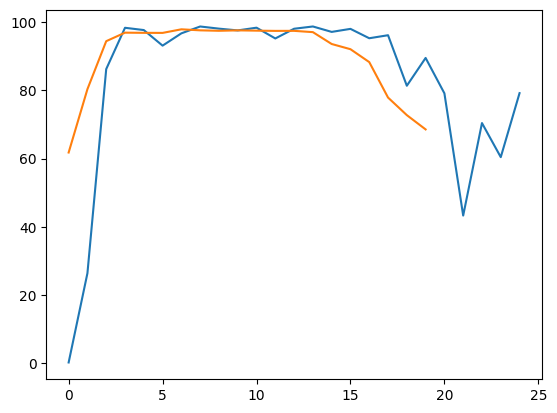

--------------------------------------------------------------------------
21_fg_4
Average happiness probability that DeepFace calculated 67.9227100970519
PEDFE emotion intensity: 70.2020202020202
Smoothed DeepFace result 37.88255461389945
original seq median 92.02903163606118
smoothed seq median 91.59293479620547


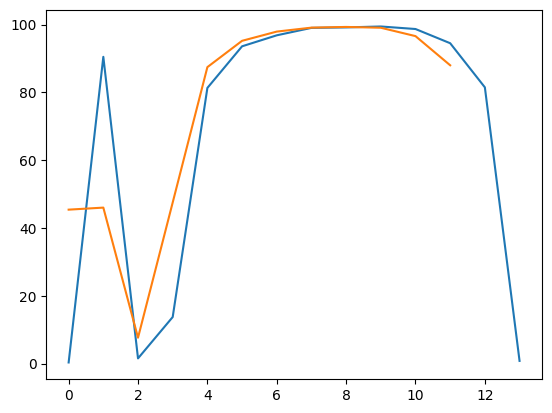

--------------------------------------------------------------------------
22_fg_3
Average happiness probability that DeepFace calculated 73.40896021980271
PEDFE emotion intensity: 47.47474747474747
Smoothed DeepFace result 37.54777940844313
original seq median 99.99206066036948
smoothed seq median 99.99551872378763


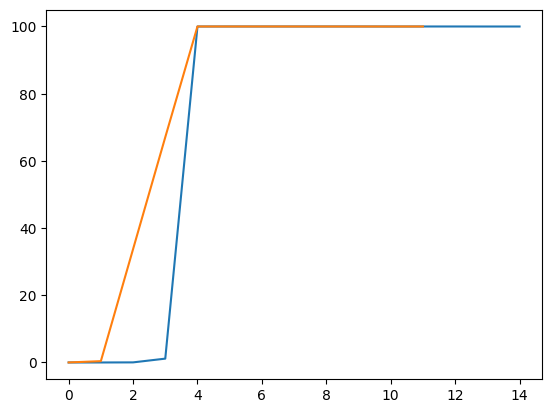

--------------------------------------------------------------------------
21_fg_2
Average happiness probability that DeepFace calculated 8.161152352400467
PEDFE emotion intensity: 52.02020202020202
Smoothed DeepFace result 4.423643685657877
original seq median 0.4484935663640499
smoothed seq median 7.714019402109184


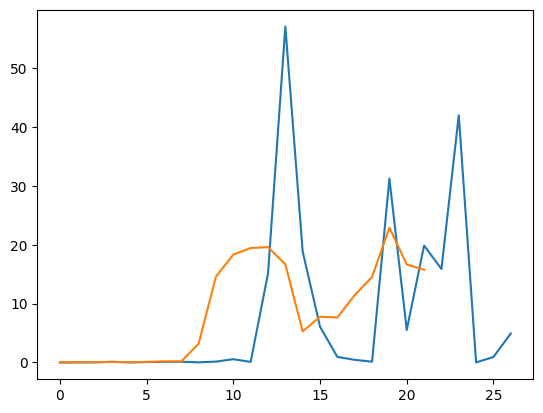

--------------------------------------------------------------------------
21_fs_1
Average happiness probability that DeepFace calculated 3.120069944747072
PEDFE emotion intensity: 28.39506172839506
Smoothed DeepFace result 1.648448230758844
original seq median 1.1365139732735665
smoothed seq median 2.3404199131660346


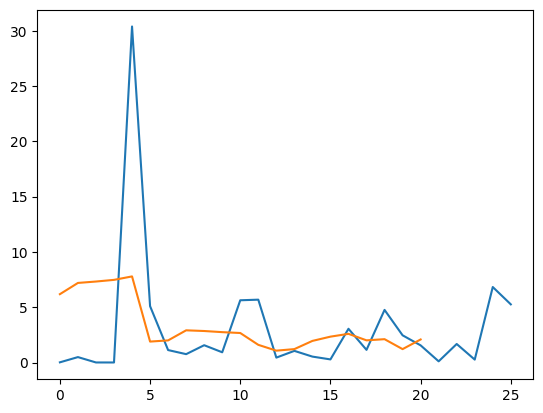

--------------------------------------------------------------------------
21_fs_2
Average happiness probability that DeepFace calculated 3.9082195977838476
PEDFE emotion intensity: 43.55555555555555
Smoothed DeepFace result 2.1431917132513894
original seq median 1.0629171169797043
smoothed seq median 3.1386398823292048


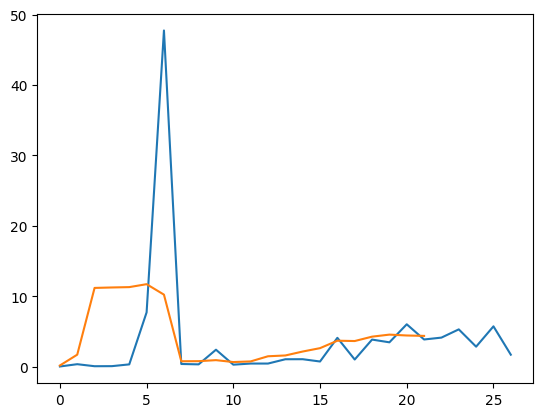

--------------------------------------------------------------------------
22_fs_1
Average happiness probability that DeepFace calculated 62.73408850597454
PEDFE emotion intensity: 42.06349206349206
Smoothed DeepFace result 30.912434768861065
original seq median 99.89171326160431
smoothed seq median 98.76204324767396


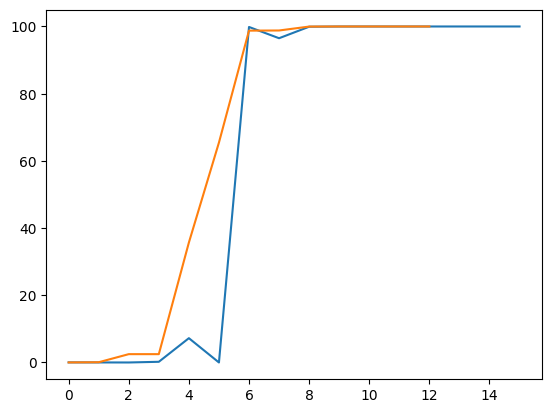

--------------------------------------------------------------------------
22_fg_1
Average happiness probability that DeepFace calculated 35.2066301255019
PEDFE emotion intensity: 36.888888888888886
Smoothed DeepFace result nan
original seq median 34.32260591235005
smoothed seq median nan


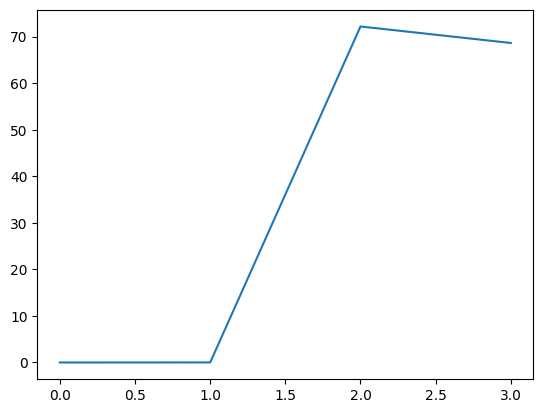

--------------------------------------------------------------------------
21_fs_3
Average happiness probability that DeepFace calculated 20.921745832572306
PEDFE emotion intensity: 31.746031746031743
Smoothed DeepFace result 11.320481827191745
original seq median 16.209271550178528
smoothed seq median 23.936087925509383


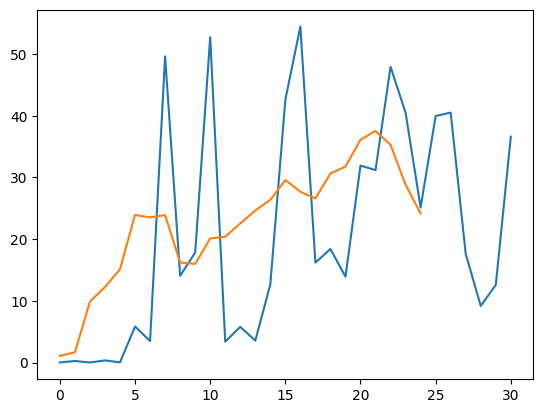

--------------------------------------------------------------------------
21_fg_3
Average happiness probability that DeepFace calculated 13.76306090135175
PEDFE emotion intensity: 56.837606837606835
Smoothed DeepFace result 8.35370939730603
original seq median 1.7360200277578848
smoothed seq median 8.609810183345195


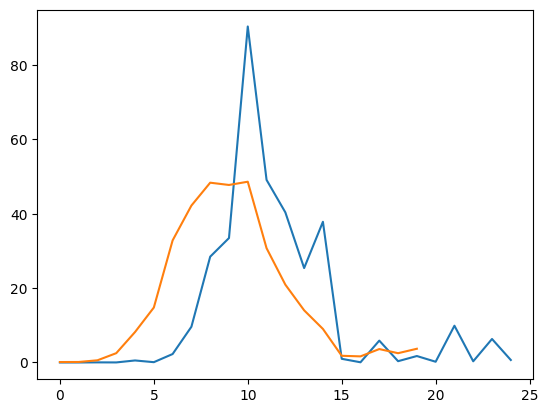

--------------------------------------------------------------------------
21_fg_1
Average happiness probability that DeepFace calculated 0.07321590636765307
PEDFE emotion intensity: 32.05128205128205
Smoothed DeepFace result 0.032516112862303284
original seq median 0.04011949536883776
smoothed seq median 0.037680214462813784


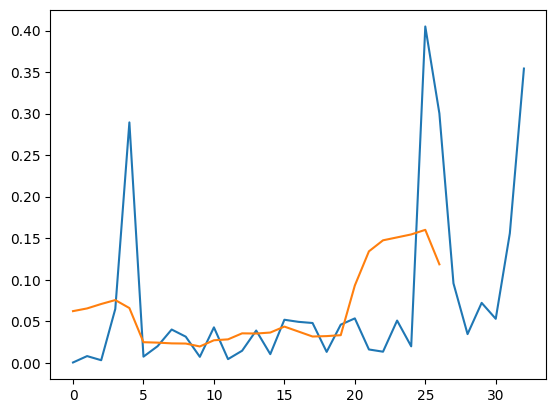

--------------------------------------------------------------------------
22_fg_2
Average happiness probability that DeepFace calculated 35.59737456656091
PEDFE emotion intensity: 41.919191919191924
Smoothed DeepFace result 15.362275152447792
original seq median 0.1491404022090137
smoothed seq median 0.35385213110254427


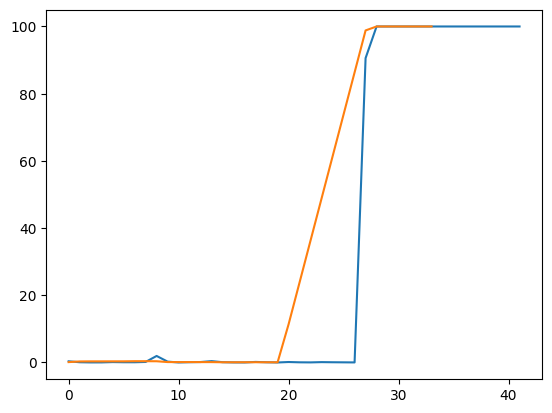

--------------------------------------------------------------------------
22_fs_2
Average happiness probability that DeepFace calculated 54.24287599183878
PEDFE emotion intensity: 42.32804232804233
Smoothed DeepFace result 26.59720983936721
original seq median 70.36589980125427
smoothed seq median 60.92904863562487


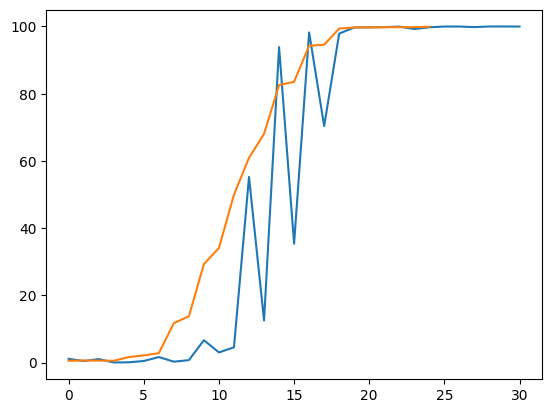

--------------------------------------------------------------------------
23_fg_4
Average happiness probability that DeepFace calculated 51.926738833335605
PEDFE emotion intensity: 46.15384615384615
Smoothed DeepFace result 27.787553296391806
original seq median 54.24048453569412
smoothed seq median 64.8261461976427


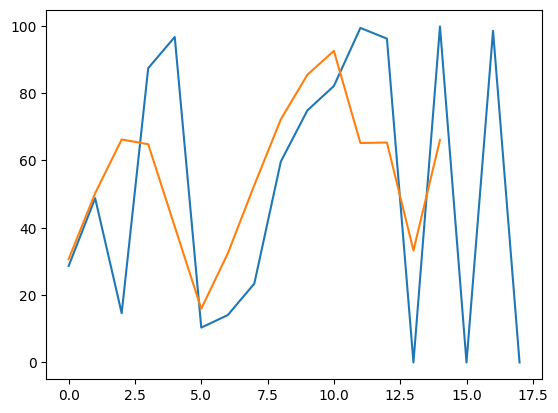

--------------------------------------------------------------------------
24_fg_4
Average happiness probability that DeepFace calculated 85.60844411682625
PEDFE emotion intensity: 60.26936026936026
Smoothed DeepFace result 43.68825548626671
original seq median 99.99675750710466
smoothed seq median 99.97341037055696


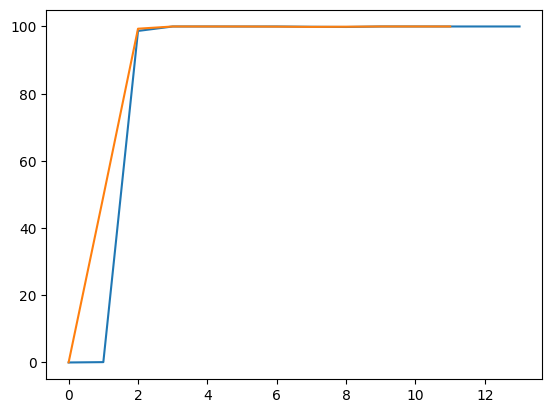

--------------------------------------------------------------------------
23_fs_2
Average happiness probability that DeepFace calculated 53.6414130049317
PEDFE emotion intensity: 47.47474747474747
Smoothed DeepFace result 25.959658495796802
original seq median 80.13631105422974
smoothed seq median 65.26596777127911


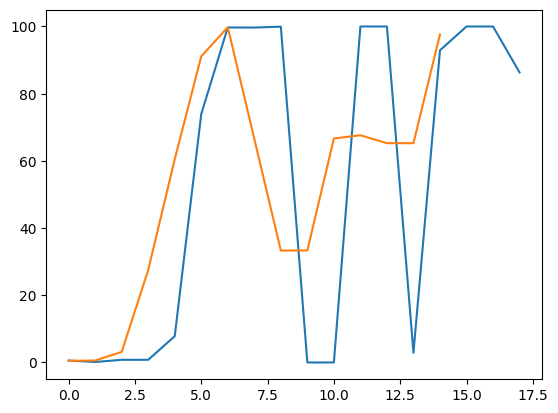

--------------------------------------------------------------------------
23_fg_3
Average happiness probability that DeepFace calculated 57.46947018526886
PEDFE emotion intensity: 34.34343434343434
Smoothed DeepFace result 32.83960454213711
original seq median 48.11733531874898
smoothed seq median 49.22175109386444


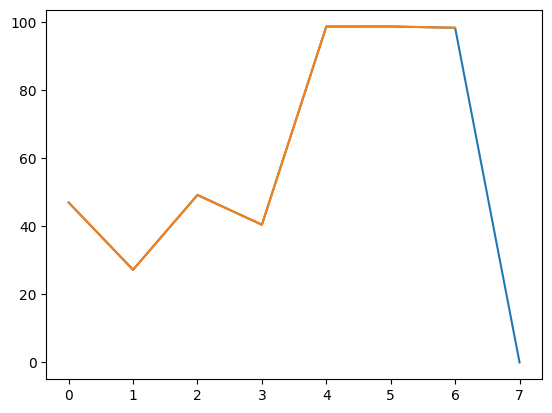

--------------------------------------------------------------------------
22_fs_3
Average happiness probability that DeepFace calculated 60.559399992360134
PEDFE emotion intensity: 26.74897119341564
Smoothed DeepFace result 28.52548251561988
original seq median 95.57754922187402
smoothed seq median 75.23356409180641


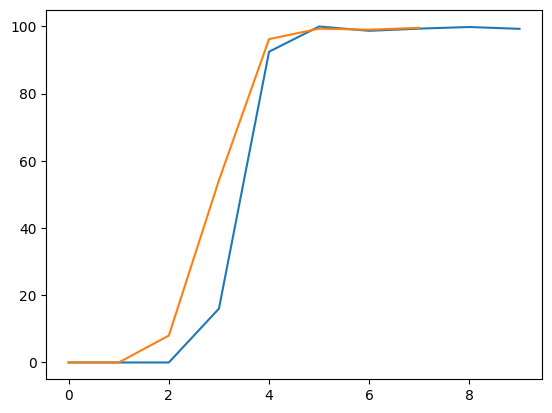

--------------------------------------------------------------------------
23_fg_2
Average happiness probability that DeepFace calculated 65.46460028907103
PEDFE emotion intensity: 39.869281045751634
Smoothed DeepFace result 31.47839211282318
original seq median 68.400947046167
smoothed seq median 60.28838239451372


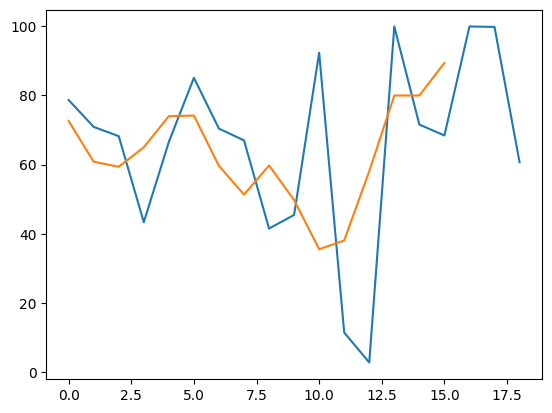

--------------------------------------------------------------------------
24_fg_2
Average happiness probability that DeepFace calculated 59.94407328740256
PEDFE emotion intensity: 53.03030303030303
Smoothed DeepFace result 28.10712263804656
original seq median 99.7791320054155
smoothed seq median 74.90058395928827


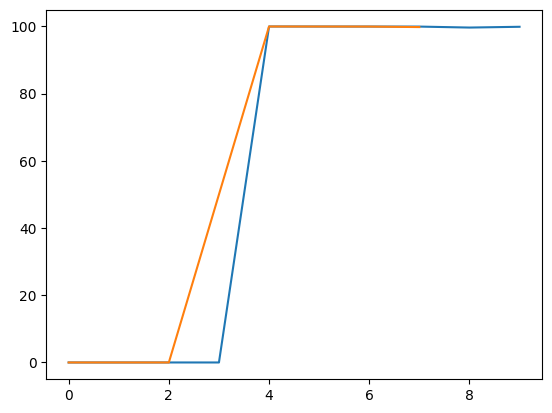

--------------------------------------------------------------------------
24_fg_1
Average happiness probability that DeepFace calculated 52.93795081051392
PEDFE emotion intensity: 28.28282828282828
Smoothed DeepFace result 26.223784810508153
original seq median 72.48006165027618
smoothed seq median 65.59010327182477


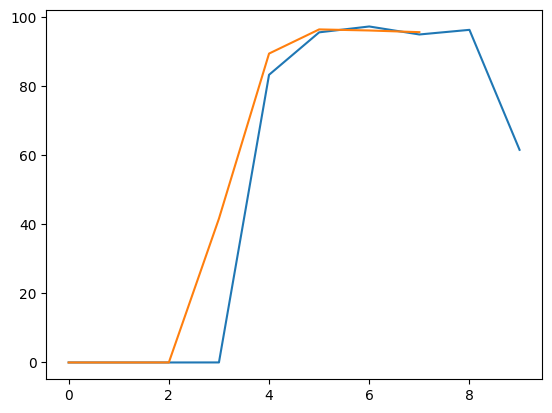

--------------------------------------------------------------------------
23_fg_5
Average happiness probability that DeepFace calculated 65.46652372436654
PEDFE emotion intensity: 54.54545454545454
Smoothed DeepFace result 32.74898971148536
original seq median 98.30386658860843
smoothed seq median 65.48724008258208


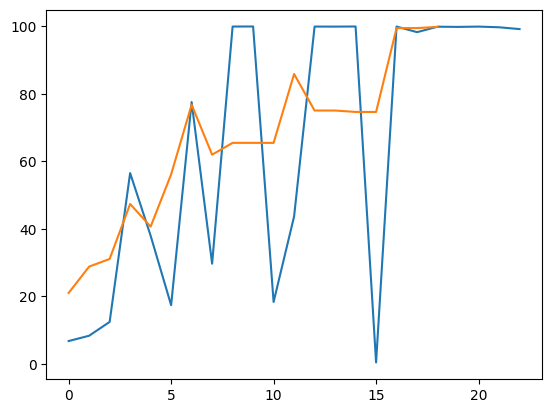

--------------------------------------------------------------------------
23_fg_1
Average happiness probability that DeepFace calculated 21.117987874162875
PEDFE emotion intensity: 30.15873015873016
Smoothed DeepFace result 10.083899708370591
original seq median 20.458301901817322
smoothed seq median 13.340976368635893


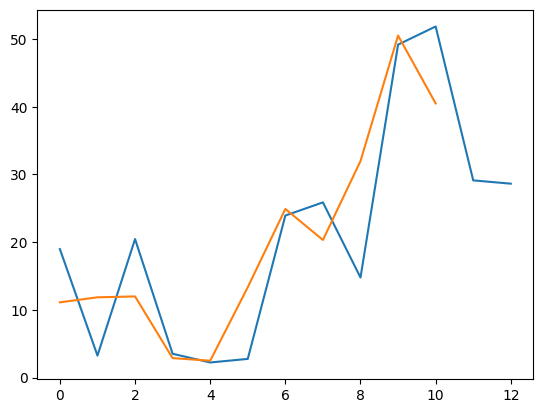

--------------------------------------------------------------------------
24_fs_1
Average happiness probability that DeepFace calculated 0.6760975079994475
PEDFE emotion intensity: 23.569023569023567
Smoothed DeepFace result 0.3471632312734333
original seq median 0.3379868692718446
smoothed seq median 0.14120761770755053


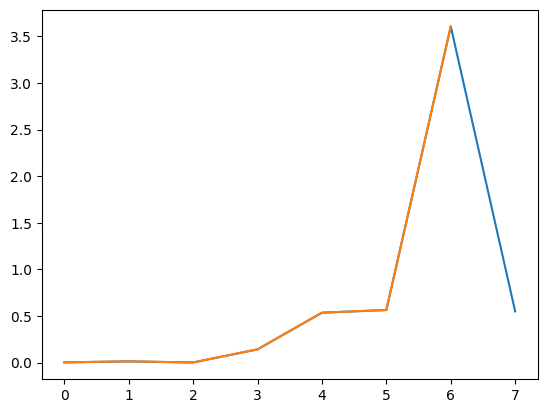

--------------------------------------------------------------------------
24_fg_3
Average happiness probability that DeepFace calculated 91.18979752058812
PEDFE emotion intensity: 67.67676767676768
Smoothed DeepFace result 44.90035399858971
original seq median 99.89895224571228
smoothed seq median 96.5610711122228


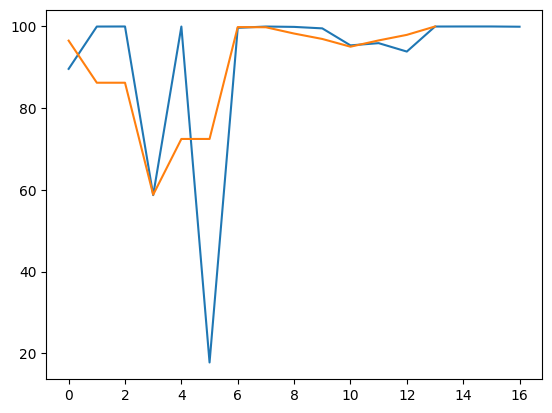

--------------------------------------------------------------------------
23_fs_1
Average happiness probability that DeepFace calculated 69.19821675126188
PEDFE emotion intensity: 30.808080808080813
Smoothed DeepFace result 34.08481113645896
original seq median 90.58836575952434
smoothed seq median 77.41071011716727


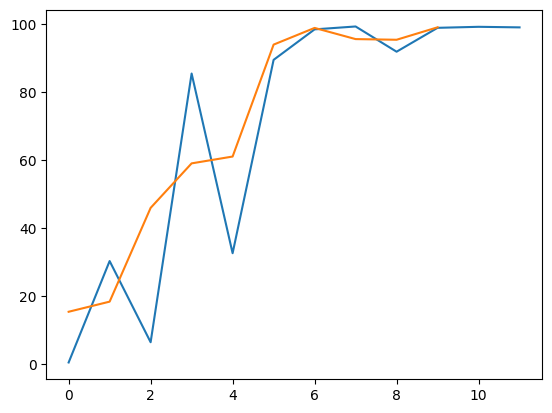

--------------------------------------------------------------------------
26_fs_1
Average happiness probability that DeepFace calculated 20.60270965618288
PEDFE emotion intensity: 23.809523809523807
Smoothed DeepFace result 6.517757511300322
original seq median 4.4348545372486115
smoothed seq median 2.3267845842077057


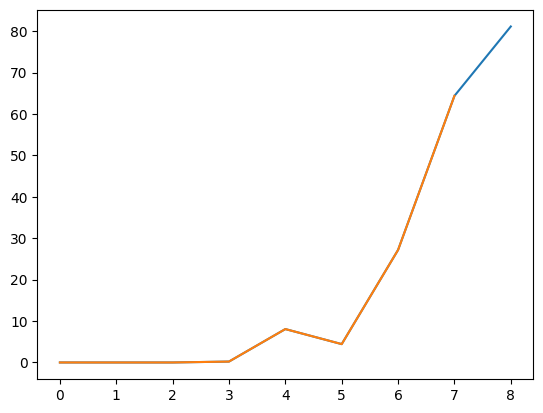

--------------------------------------------------------------------------
24_fs_3
Average happiness probability that DeepFace calculated 92.01225110379706
PEDFE emotion intensity: 39.05723905723906
Smoothed DeepFace result 47.803591053297566
original seq median 97.77079807345855
smoothed seq median 97.83787416190835


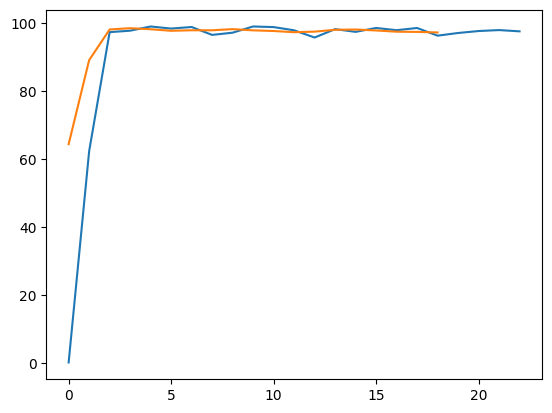

--------------------------------------------------------------------------
26_fs_3
Average happiness probability that DeepFace calculated 61.0321918610439
PEDFE emotion intensity: 28.95622895622896
Smoothed DeepFace result 29.961066642467337
original seq median 99.85572100827582
smoothed seq median 99.69217575265645


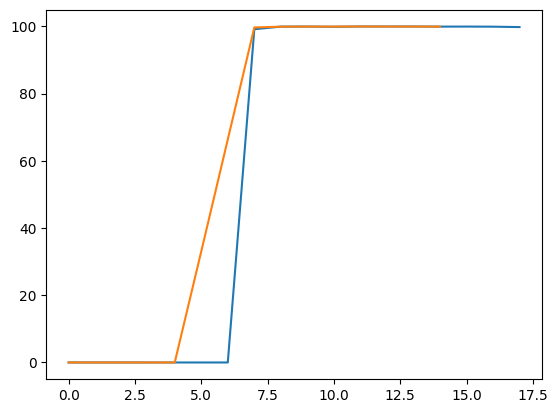

--------------------------------------------------------------------------
25_fg_4
Average happiness probability that DeepFace calculated 68.43631605638528
PEDFE emotion intensity: 50.24154589371981
Smoothed DeepFace result 34.928095580786945
original seq median 99.1258531602071
smoothed seq median 98.34069013752057


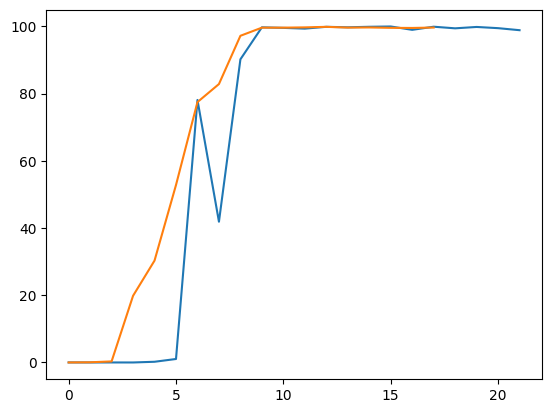

--------------------------------------------------------------------------
26_fs_2
Average happiness probability that DeepFace calculated 67.65974610823072
PEDFE emotion intensity: 37.37373737373738
Smoothed DeepFace result 34.43626374515227
original seq median 99.99978542327881
smoothed seq median 99.99482184689876


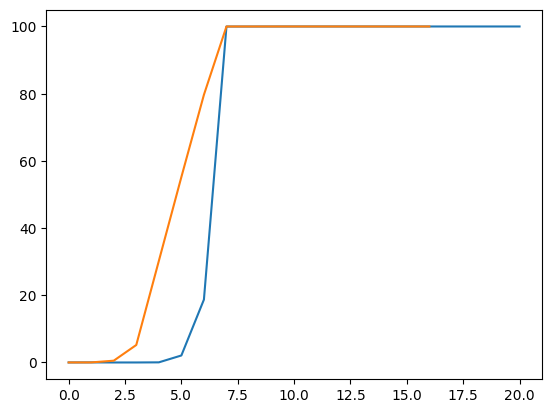

--------------------------------------------------------------------------
24_fs_2
Average happiness probability that DeepFace calculated 76.93786812169027
PEDFE emotion intensity: 55.55555555555556
Smoothed DeepFace result 38.64449346998768
original seq median 99.99968409536386
smoothed seq median 99.96984601005093


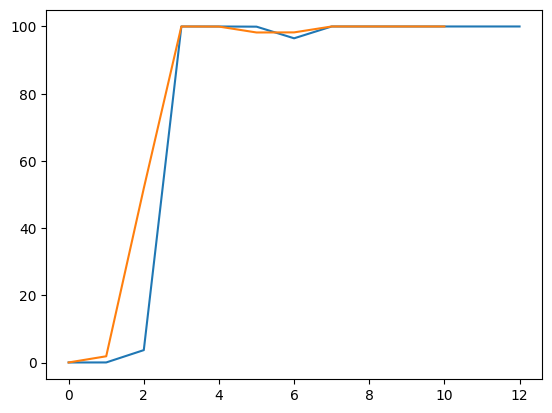

--------------------------------------------------------------------------
25_fs_2
Average happiness probability that DeepFace calculated 0.21220022572439518
PEDFE emotion intensity: 37.03703703703704
Smoothed DeepFace result 0.10270003339175564
original seq median 0.11387486010789871
smoothed seq median 0.1462842300247465


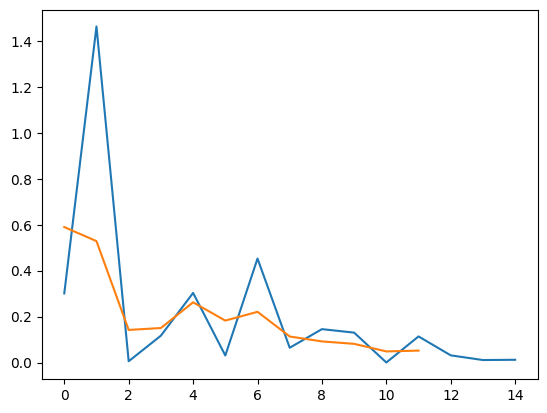

--------------------------------------------------------------------------
25_fg_1
Average happiness probability that DeepFace calculated 7.809045409396617
PEDFE emotion intensity: 38.42592592592593
Smoothed DeepFace result 3.8458317382138962
original seq median 4.156751185655594
smoothed seq median 5.936618372092739


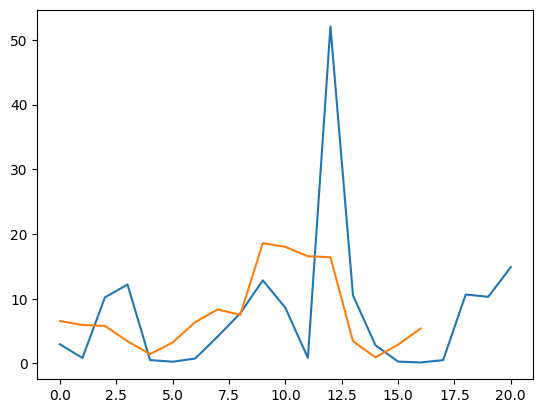

--------------------------------------------------------------------------
25_fg_2
Average happiness probability that DeepFace calculated 22.76019919319031
PEDFE emotion intensity: 56.22895622895623
Smoothed DeepFace result 9.441957779150822
original seq median 5.672639635346991
smoothed seq median 23.7825560621037


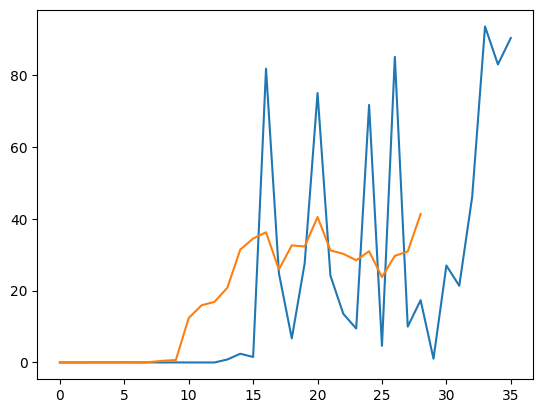

--------------------------------------------------------------------------
26_fg_1
Average happiness probability that DeepFace calculated 15.85692809699045
PEDFE emotion intensity: 22.22222222222222
Smoothed DeepFace result 8.34840235726416
original seq median 0.45581606682389975
smoothed seq median 0.3074683680703553


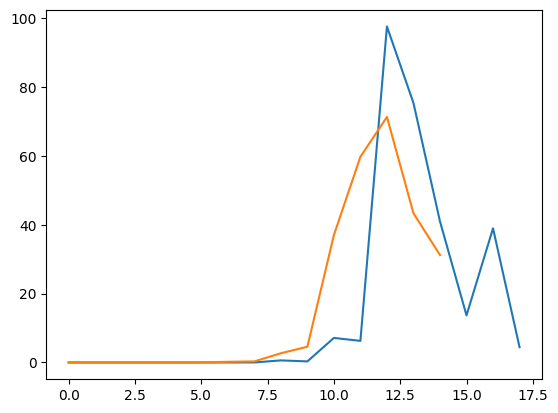

--------------------------------------------------------------------------
26_fs_4
Average happiness probability that DeepFace calculated 82.34078925909596
PEDFE emotion intensity: 42.76094276094276
Smoothed DeepFace result 42.849759987517935
original seq median 100.0
smoothed seq median 99.99989469846278


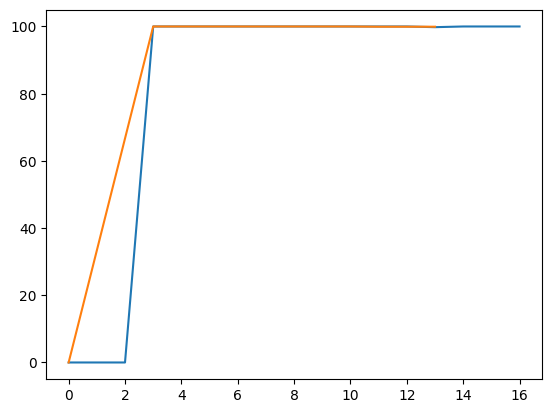

--------------------------------------------------------------------------


In [ ]:
glb_cnt = 0
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))


  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    if df[(df["PEDFE_code"]==code)].iloc[0,4] != 'Happiness':
      continue
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt==80:
    break

  cnt = 0
  avg_happiness = 0.0
  emotions_seq = list()
  happiness_coef = 0.0 # sum of the probalility of happiness of each frame in the video

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    if cnt % 3 != 0:
      continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)
    num_happy_faces = 0

    for x in results:
        emotions_seq.append(x['emotion']['happy'])
        happiness_coef += x['emotion']['happy']
        num_happy_faces += 1 if x['dominant_emotion'] == 'happy' or x['dominant_emotion'] == '' else 0
        face_region = x['region']
        # color = (0, 255, 0) if x['dominant_emotion'] == 'happy' or x['dominant_emotion'] == '' else (0, 0, 255)
        # cv2.rectangle(frame, (face_region['x'], face_region['y']), (face_region['x'] + face_region['w'], face_region['y'] + face_region['h']), color, 2)

    # Display the frame with the count of happy faces
    # cv2.putText(frame, f"Happy Faces: {num_happy_faces} Frame: {cnt} Total Faces Detected: {len(results)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # update the average happiness
    avg_happiness += num_happy_faces*1.0 / len(results)

    # Display the resulting frame
    # cv2.imshow('Video', frame)

    # Break the loop if 'q' key is pressed
    # if cv2.waitKey(1) & 0xFF == ord('q'):
        # break

  # Release the video capture object
  # video_capture.release()

  # Destroy all OpenCV windows
  # cv2.destroyAllWindows()
  avg_happiness /= cnt
  print(code)
  print(f'Average happiness probability that DeepFace calculated {happiness_coef / len(emotions_seq)}')
  print(f'PEDFE emotion intensity: {float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100}')

  window_size = int(0.2 * len(emotions_seq))
  smoothed_emotion_seq = []

  df2 = pd.DataFrame(emotions_seq, columns=['Happiness coef'])

  for x in range(0, len(emotions_seq)-window_size):
    smoothed_emotion_seq.append(df2['Happiness coef'].iloc[x:x+window_size].mean())

  df3 = pd.DataFrame(smoothed_emotion_seq, columns=['Happiness coef'])

  print(f'Smoothed DeepFace result {df3["Happiness coef"].mean() / 2}')
  print(f'original seq median {df2["Happiness coef"].median()}')
  print(f'smoothed seq median {df3["Happiness coef"].median()}')

  plt.plot(emotions_seq)
  plt.plot(smoothed_emotion_seq)
  plt.show()
  print('--------------------------------------------------------------------------')

## Part 6: Experimenting with discretization of the output - turning DeepFace results into 3 different intentisities labes (low, medium, heigh)

In [10]:
def encode_i_label(intensity):
  if 0 <= intensity <= 33.3:
    return 'low'
  elif 33.3 < intensity <= 66.6:
    return 'medium'
  else:
    return 'high'

In [12]:
glb_cnt = 0
acc = 0
y_true = []
y_pred = []
for video in video_files:
  video_capture = cv2.VideoCapture(os.path.join(folder_path, video))


  code = video.split(".")[0]

  if df['PEDFE_code'].isin([code]).any():
    if df[(df["PEDFE_code"]==code)].iloc[0,4] != 'Happiness':
      continue
  else:
    continue

  if not video_capture.isOpened():
        print("Error: Could not open video file ", video)
        continue

  glb_cnt += 1

  if glb_cnt == 101:
    break

  cnt = 0
  emotions_seq = list()
  happiness_coef = 0.0 # sum of the probalility of happiness of each frame in the video

  while True:
    # Read each frame from the video
    ret, frame = video_capture.read()

    cnt += 1
    if cnt % 3 != 0:
      continue

    if not ret:
      break

    results = DeepFace.analyze(frame, actions="emotion", enforce_detection=False)

    for x in results:
        emotions_seq.append(x['emotion']['happy'])
        happiness_coef += x['emotion']['happy']

  # Release the video capture object
  video_capture.release()

  print(code)
  print(f'Average happiness probability that DeepFace calculated {happiness_coef / len(emotions_seq)}')
  print(f'PEDFE emotion intensity: {float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100}')

  window_size = int(0.2 * len(emotions_seq))
  smoothed_emotion_seq = []

  df2 = pd.DataFrame(emotions_seq, columns=['Happiness coef'])

  for x in range(0, len(emotions_seq)-window_size):
    smoothed_emotion_seq.append(df2['Happiness coef'].iloc[x:x+window_size].mean())

  df3 = pd.DataFrame(smoothed_emotion_seq, columns=['Happiness coef'])

  print(f'Smoothed DeepFace result {df3["Happiness coef"].mean()}')

  labeled_df_res = encode_i_label(happiness_coef / len(emotions_seq))
  labeled_pedfe_res = encode_i_label(float(df[df["PEDFE_code"]==code].iloc[0,9])/9.0 * 100)

  print(f'labeled DeepFace result: {labeled_df_res}')
  print(f'labeled PEDFE result: {labeled_pedfe_res}')
  print(f'labeled smoothed result: {encode_i_label(df3["Happiness coef"].mean())}')
  if labeled_df_res == labeled_pedfe_res:
    acc += 1

  y_true.append(labeled_pedfe_res)
  y_pred.append(labeled_df_res)

  print('--------------------------------------------------------------------------')
print(f'Accuracy: {acc / (glb_cnt - 1)}')

13_fg_3
Average happiness probability that DeepFace calculated 4.70374077136366
PEDFE emotion intensity: 38.62433862433863
Smoothed DeepFace result 0.22494359681360082
labeled DeepFace result: low
labeled PEDFE result: medium
labeled smoothed result: low
--------------------------------------------------------------------------
12_fg_1
Average happiness probability that DeepFace calculated 86.31927252548745
PEDFE emotion intensity: 67.34006734006735
Smoothed DeepFace result 88.36587105989382
labeled DeepFace result: high
labeled PEDFE result: high
labeled smoothed result: high
--------------------------------------------------------------------------
17_fg_1
Average happiness probability that DeepFace calculated 92.99355747023714
PEDFE emotion intensity: 76.43097643097643
Smoothed DeepFace result 92.37593429441594
labeled DeepFace result: high
labeled PEDFE result: high
labeled smoothed result: high
--------------------------------------------------------------------------
13_fg_4
Aver